# Substrato - C240830

In [2]:
from varshni_subroutines import *

import warnings
warnings.filterwarnings("ignore", category=pd.errors.ParserWarning)

In [3]:
np.set_printoptions(legacy='1.25')

In [4]:
from qp2_subroutines import fit_N_gaussiane, gaussiana, N_gaussiane, chi2_gaussiana, N_gaussiane_traslate

In [5]:
import os
os.getcwd() 

'/Users/zosojack/lab-ss/DEFINITIVO_QM2'

In [6]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

In [7]:
campione_2 = 'campione_1/C240830_'
d_o_emi = ['0', '0o5', '1', '1o5', '2', '2o5', '3']#, '3o5']
d_o_ass = ['0', '1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

#### poi plotterò sovrapposte le regioni QD con emi=1, ass=0

In [8]:
x_sovra = []
y_sovra = []

# PULIZIA DEI DATI NON CORRETTI IN LABORATORIO

In [9]:
def escludi_picchi_spuri (counts, n_picchi_da_rimuovere=1):

    # calcolo media (che sarà maggiore/minore del normale a causa dei picchi spuri)
    media  = np.mean(counts)
    if media > 0: 
        for j in range(n_picchi_da_rimuovere):

            # prendo il massimo 
            i_max = np.argmax(counts)
            # escludo regione dei counts attorno al massimo che differisce da media per più di 1sigma
            i_inf = i_max
            while i_inf > 0 and counts[i_inf]>media:
                i_inf -= 1
            
            i_sup = i_max
            while i_sup < len(counts) - 1 and counts[i_sup]>media:
                i_sup += 1
            
            counts = np.concatenate((counts[:i_inf], counts[i_sup+1:]))
            
            # ri-calcolo media 
            media  = np.mean(counts)
            
    # se la media è minore di zero, elimino i picchi negativi
    else:
        for j in range(n_picchi_da_rimuovere):
            
            # prendo il minimo 
            i_min = np.argmin(counts)
            # escludo regione dei counts attorno al massimo che differisce da media per più di 1sigma
            i_inf = i_min
            while i_inf > 0 and counts[i_inf]<media:
                i_inf -= 1
            
            i_sup = i_min
            while i_sup < len(counts) - 1 and counts[i_sup]<media:
                i_sup += 1
            
            counts = np.concatenate((counts[:i_inf], counts[i_sup+1:]))
            
            # ri-calcolo media 
            media  = np.mean(counts)
        
    return counts

### Per traslare in basso i counts normalizzati (non avevamo tolto il rumore)

In [10]:
def trasla_counts (waveln, counts):
    mask = (waveln < 650) 
    help = counts[mask]
    
    help2 = escludi_picchi_spuri(help, n_picchi_da_rimuovere=5)
    
    media  = np.mean(help2)
    dev = np.std(help2)

    if media>0:
        return counts - abs(media)
    elif media<0:
        return counts + abs(media)
    else:
        return counts

### Per la normalizzazione

In [11]:
lista_dei_massimi = []

In [12]:
for ass in d_o_ass:
    emi_list = d_o_emi[1:] if ass == '0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        arr_energia = []

        # Ciclo sulla temperatura
        for temp in arr_temperatura:
            try:
                nome_file = build_name(campione_2, emi, ass, temp, cartella='data/rampa_T/')
                waveln, counts = leggi_file(nome_file)
                
            except FileNotFoundError:
                print(f"File non trovato: {nome_file}")
                continue
            
            # converto
            counts = np.array(counts)
            
             # prendo il massimo e lo metto nella lista
            lista_dei_massimi.append(np.max(counts))

In [13]:
# prendo il massimo dei massimi
conteggio_massimo_assoluto = np.max(np.array(lista_dei_massimi))

USARE QUESTO PER TUNARE L'ERRORE!!!

In [14]:
n_acq = 1/20

---

# PLOT

In [15]:
DELTA_Y = True

C'è da fittare (700, 800) e (800,860)

• Gaussiana  1 [red]
 - A = 0.2773637399342149
 - mu = 712.2170490682385 | 1.7408340198716699 eV
 - sigma = 6.010777247385171 | 0.014691821168572096 eV
 - chi2rid = 30.623857315895364
• Gaussiana  2 [magenta]
 - A = 0.7659062568013875
 - mu = 817.8885480315661 | 1.5159176290395355 eV
 - sigma = 4.040345044162972 | 0.007488587894511985 eV
• Gaussiana  3 [purple]
 - A = 0.1824239439391691
 - mu = 819.6014383858871 | 1.5127495029685993 eV
 - sigma = 8.465126947355232 | 0.015624199742007462 eV
 - chi2rid = 30.780305103138563


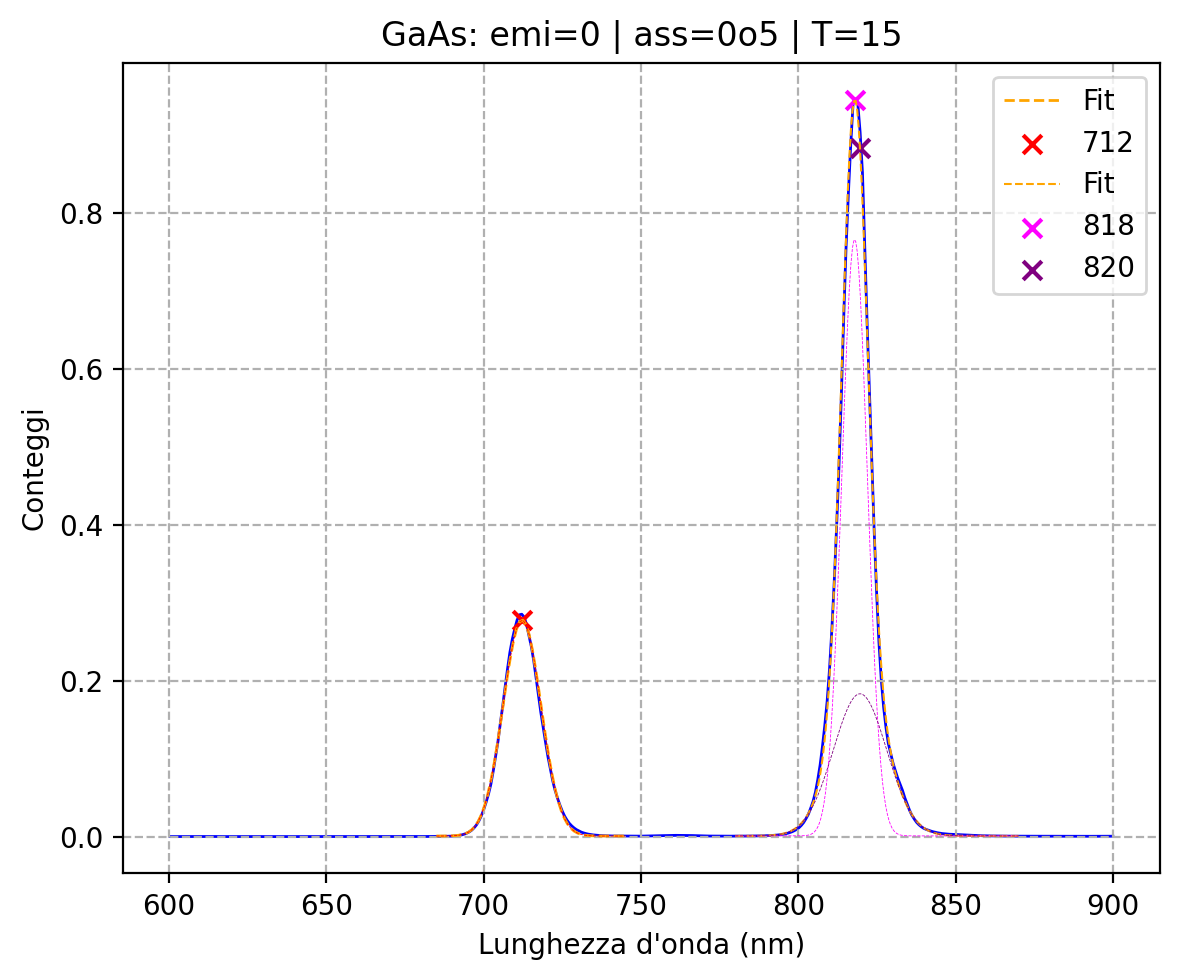

• Gaussiana  1 [red]
 - A = 0.17173972646015181
 - mu = 712.8024794142275 | 1.7394042590445182 eV
 - sigma = 6.465049468915611 | 0.015776228206173745 eV
 - chi2rid = 14.114459066734529
• Gaussiana  2 [magenta]
 - A = 0.8682369610141963
 - mu = 818.0817029423771 | 1.5155597101013893 eV
 - sigma = 4.268868117382121 | 0.007908408785053118 eV
• Gaussiana  3 [purple]
 - A = 0.12305351641859133
 - mu = 818.5074676724711 | 1.514771358258067 eV
 - sigma = 8.760322414196889 | 0.016212296168617985 eV
 - chi2rid = 44.754342778183855


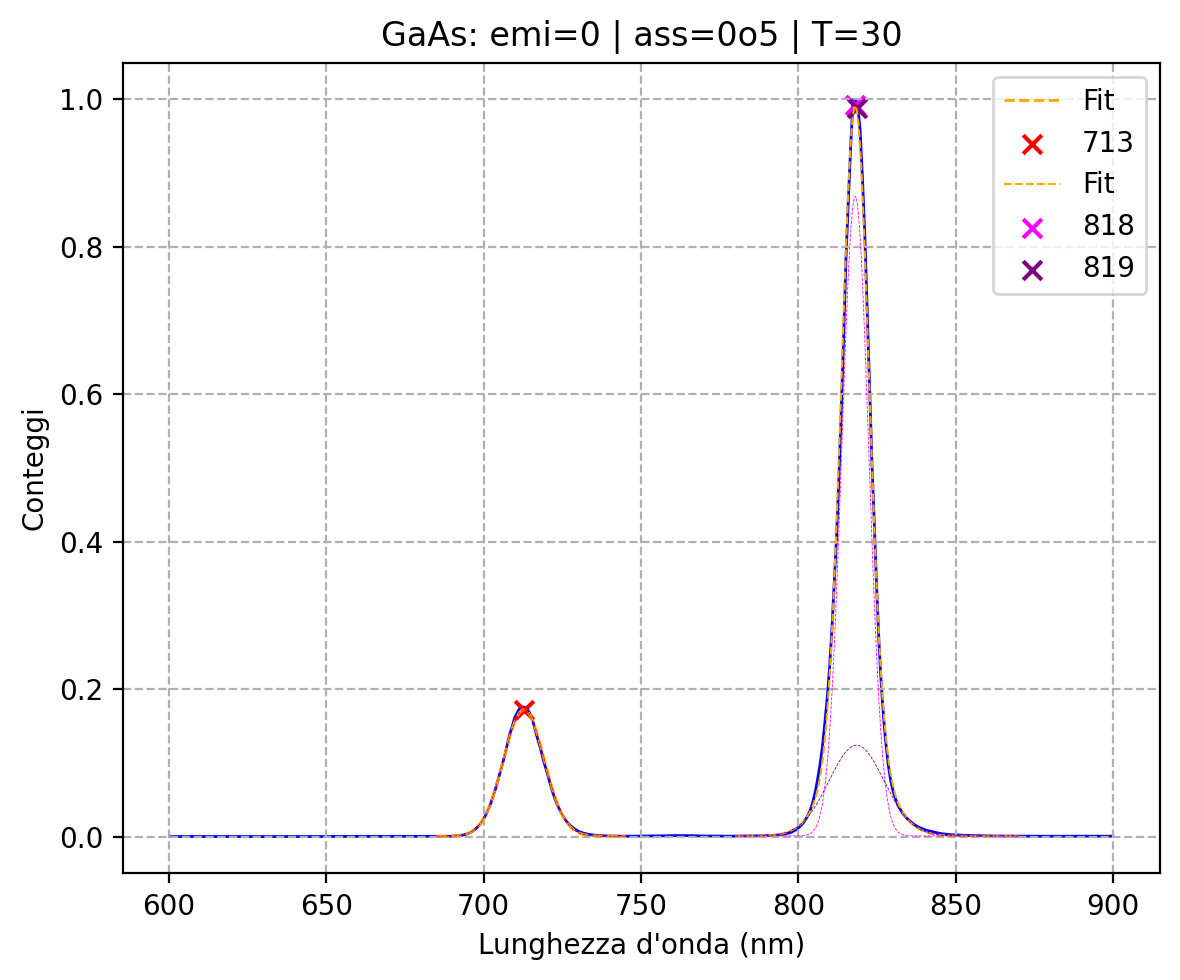

• Gaussiana  1 [red]
 - A = 0.05465052991176219
 - mu = 713.3616740661226 | 1.738040763366937 eV
 - sigma = 7.199856000650226 | 0.017541793559184442 eV
 - chi2rid = 2.8761823166733036
• Gaussiana  2 [magenta]
 - A = 0.7620678159030413
 - mu = 818.6324682221388 | 1.5157022460874505 eV
 - sigma = 4.429218466055875 | 0.015577717797942581 eV
• Gaussiana  3 [purple]
 - A = 0.14433976756574632
 - mu = 818.004770891568 | 1.5145400612355897 eV
 - sigma = 8.407091505744408 | 0.008194432870925136 eV
 - chi2rid = 54.29101293200517


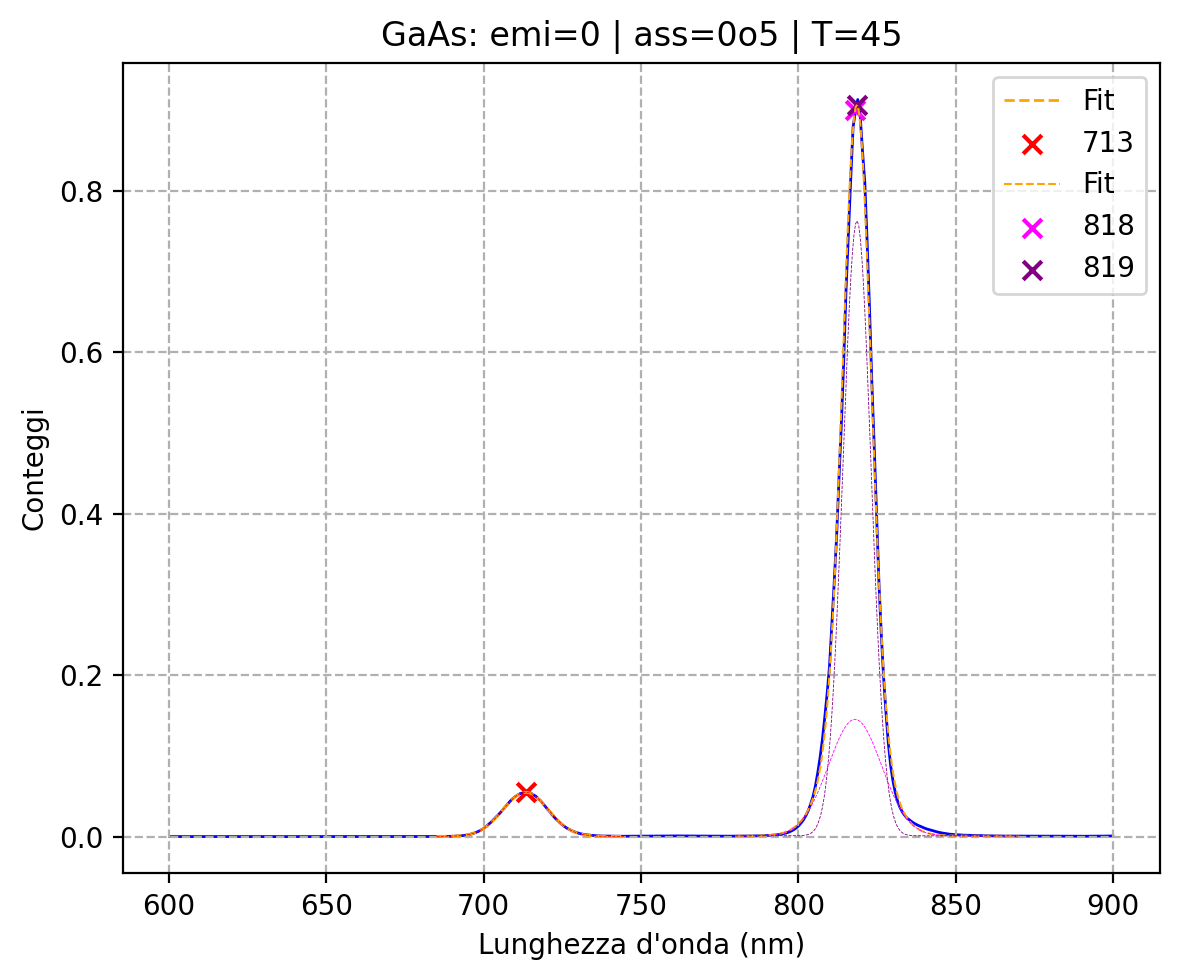

• Gaussiana  1 [red]
 - A = 0.004329916859968851
 - mu = 712.6766219606212 | 1.7397114348155334 eV
 - sigma = 8.594514353008709 | 0.020980027176255047 eV
 - chi2rid = 1.1134442823997954
• Gaussiana  2 [magenta]
 - A = 0.22526764188049464
 - mu = 818.289813193409 | 1.5151742677964286 eV
 - sigma = 8.320334879343006 | 0.015406225404946992 eV
• Gaussiana  3 [purple]
 - A = 0.586993014182728
 - mu = 820.3671762102571 | 1.5113374894863303 eV
 - sigma = 4.664809584057473 | 0.008593836772297041 eV
 - chi2rid = 43.04509768745803


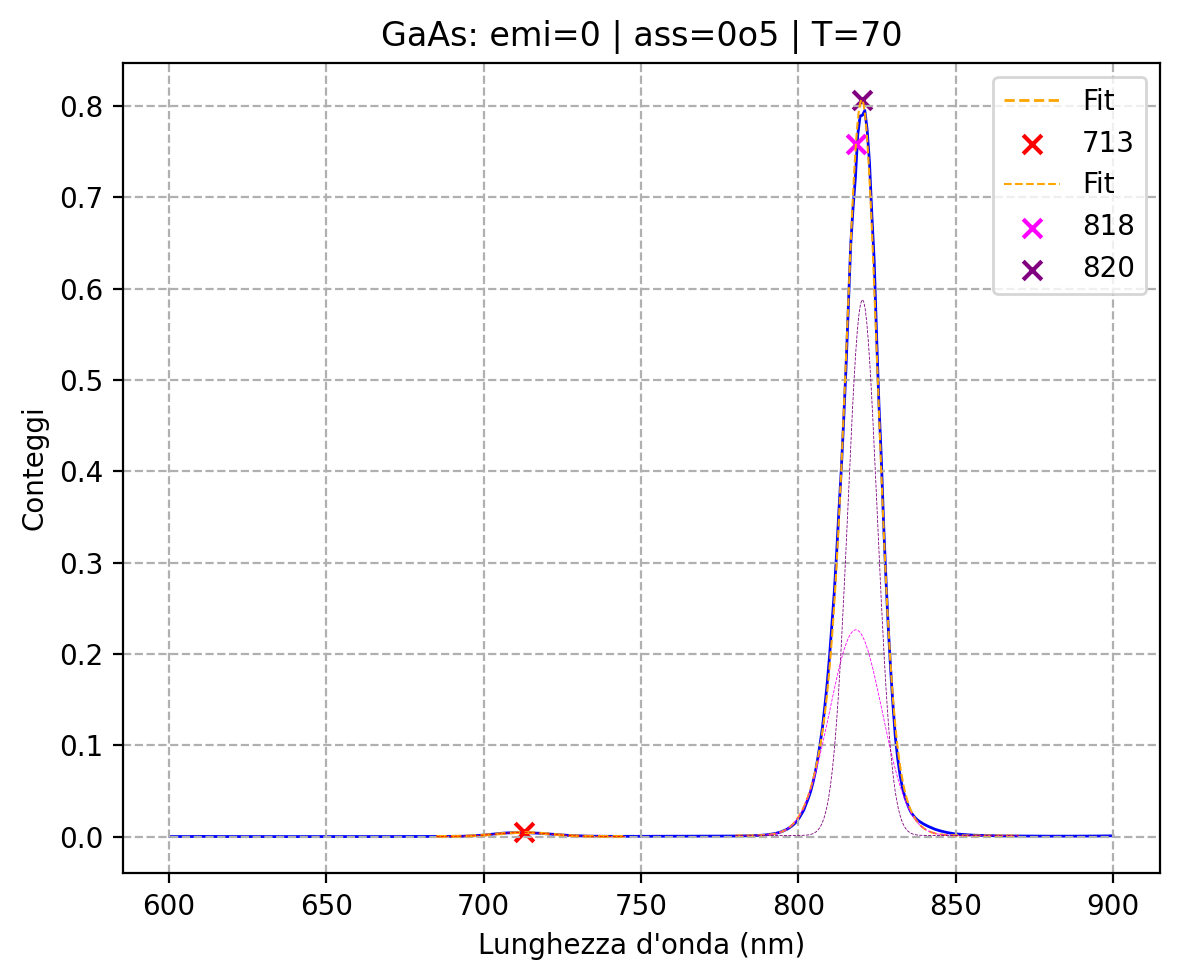

• Gaussiana  1 [magenta]
 - A = 0.1743717511876348
 - mu = 820.1783083661344 | 1.5116855150930424 eV
 - sigma = 9.872941962297787 | 0.018196998388669033 eV
• Gaussiana  2 [purple]
 - A = 0.33141204613796205
 - mu = 823.9379085423678 | 1.5047877463776693 eV
 - sigma = 5.317394153044286 | 0.009711350189381239 eV
 - chi2rid = 22.551843836003165


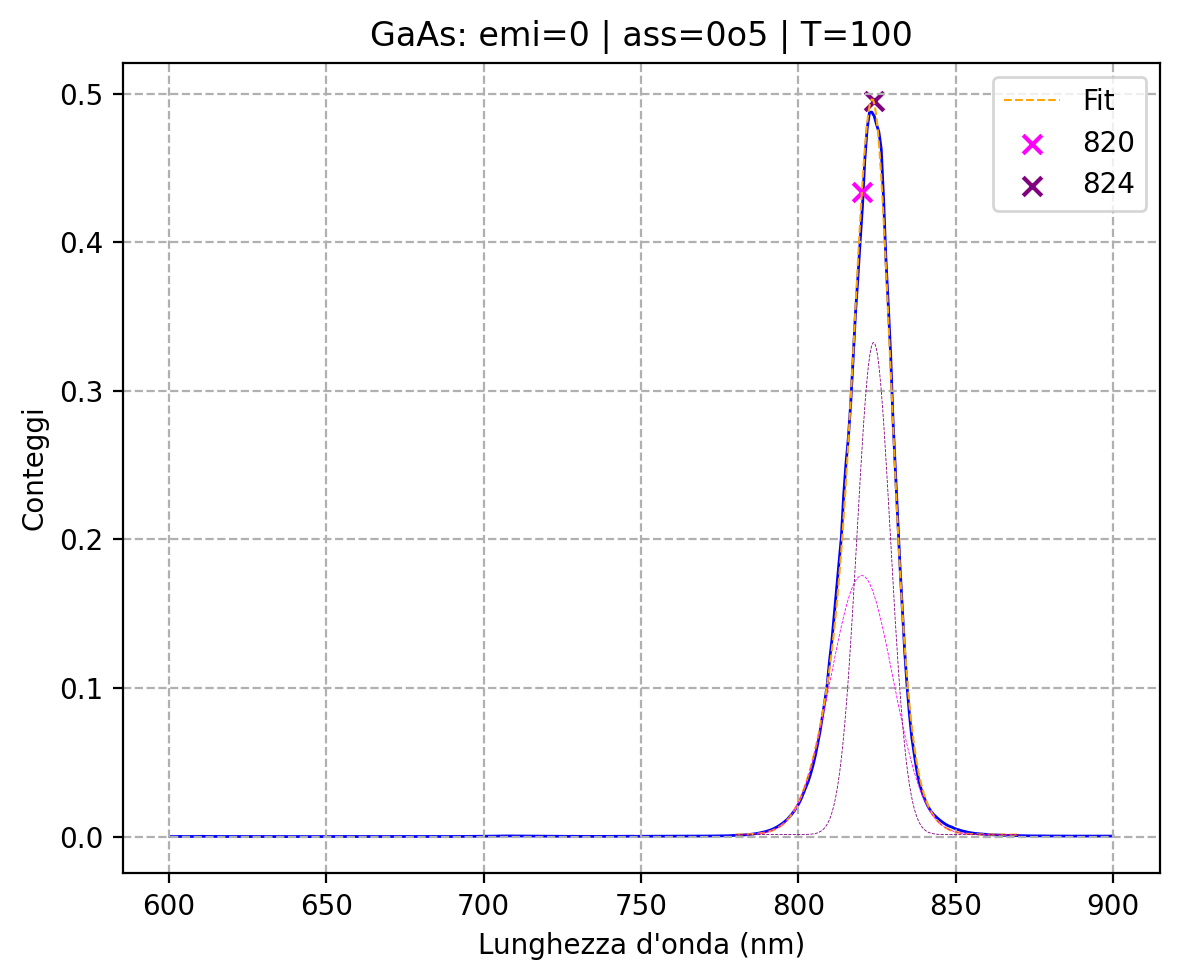

• Gaussiana  1 [magenta]
 - A = 0.19399777210633398
 - mu = 832.7318622639265 | 1.5036592593503566 eV
 - sigma = 6.908446687406332 | 0.022879244292657447 eV
• Gaussiana  2 [purple]
 - A = 0.10878180922538244
 - mu = 824.5562688758805 | 1.488896636163107 eV
 - sigma = 12.546209649122217 | 0.012352070936768612 eV
 - chi2rid = 10.698731738252416


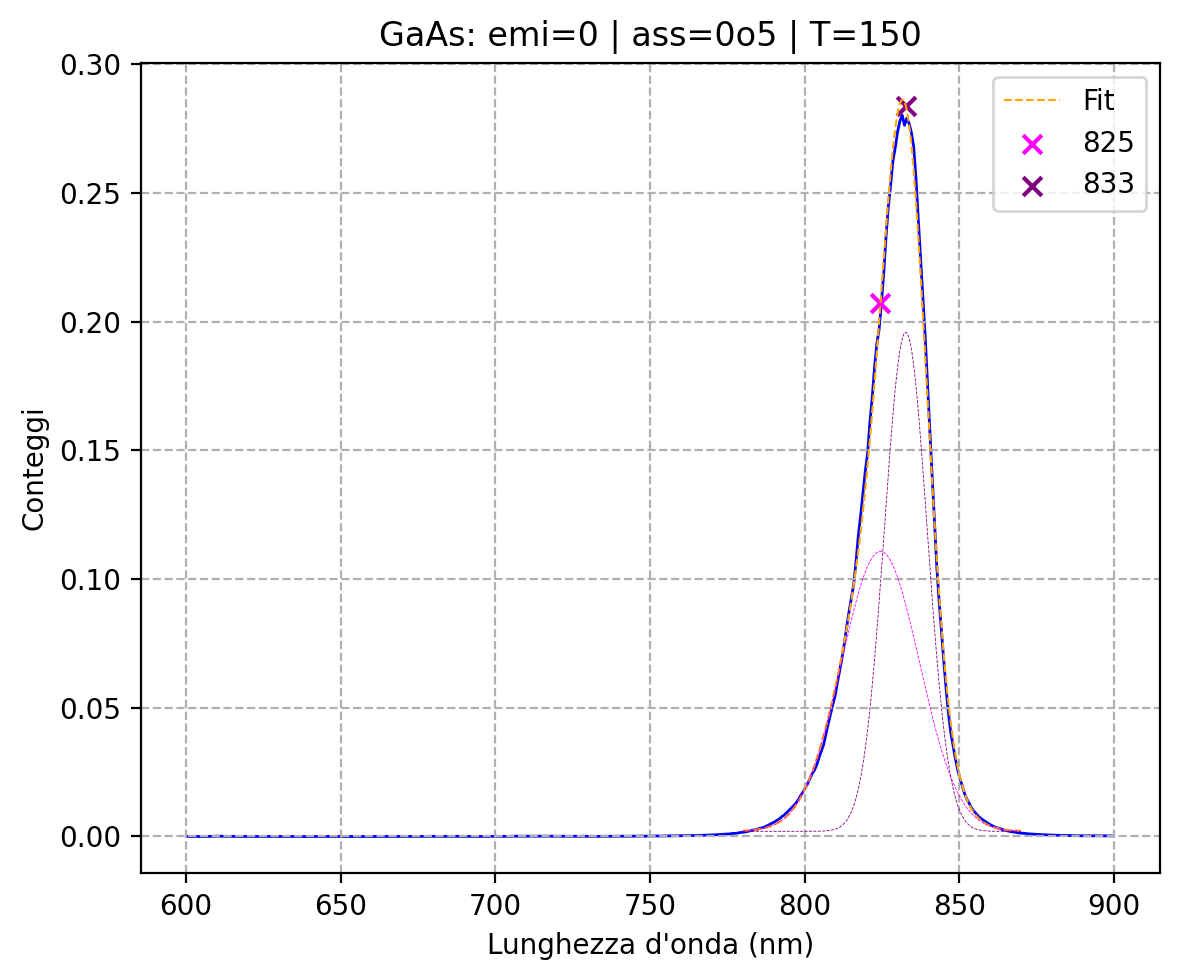

• Gaussiana  1 [red]
 - A = 0.14563003541709005
 - mu = 712.6507856731566 | 1.7397745059376581 eV
 - sigma = 5.739492620664905 | 0.014011663411018449 eV
 - chi2rid = 22.676170033299154
• Gaussiana  2 [magenta]
 - A = 0.3299033212439913
 - mu = 818.2171856701387 | 1.5153087594159156 eV
 - sigma = 3.657537440022627 | 0.006773627611131977 eV
• Gaussiana  3 [purple]
 - A = 0.05908656727855387
 - mu = 821.1591895212312 | 1.5098797947733902 eV
 - sigma = 8.12732419413889 | 0.01494385344875442 eV
 - chi2rid = 8.529983067365023


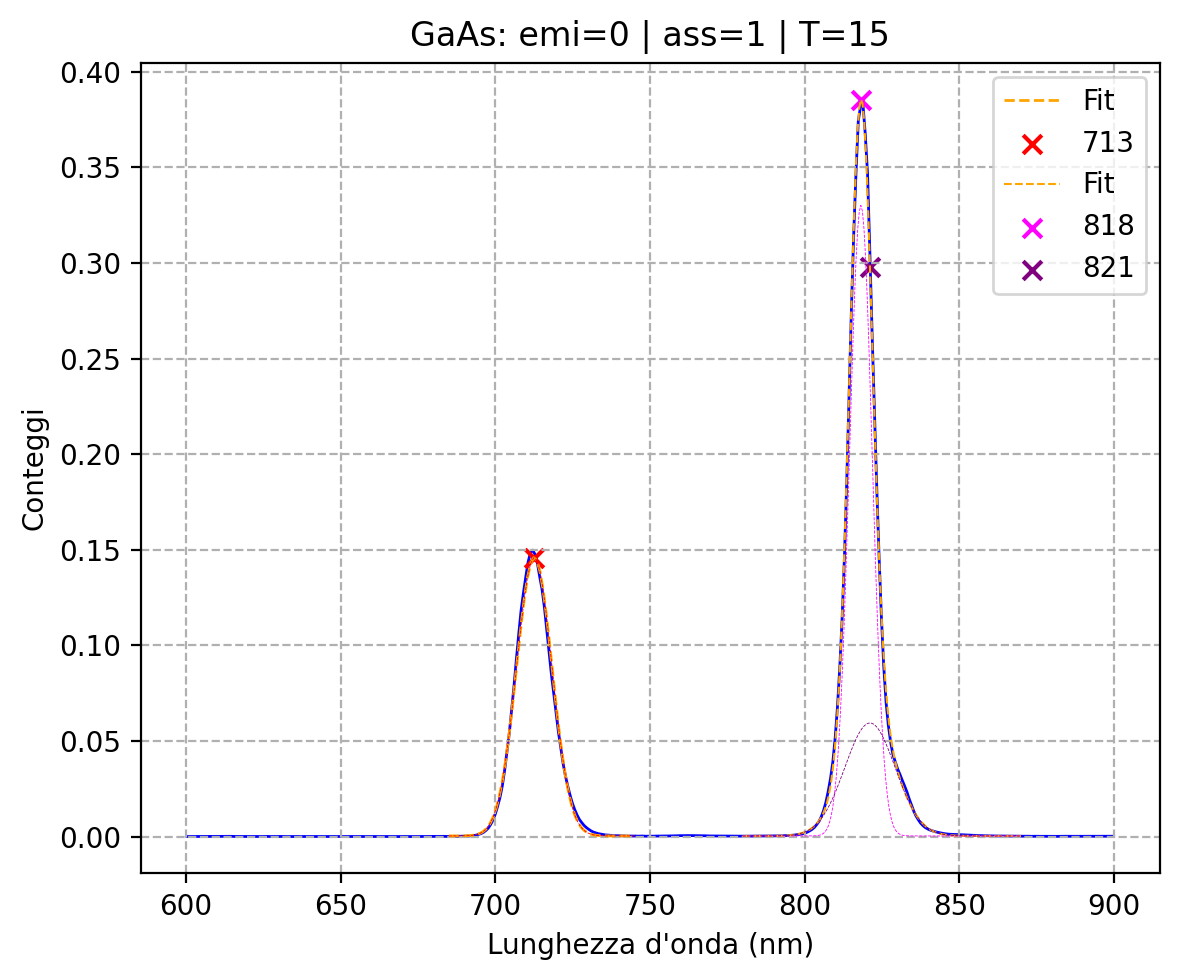

• Gaussiana  1 [red]
 - A = 0.06578189001199948
 - mu = 713.7898918257112 | 1.7369980756933152 eV
 - sigma = 6.159131263469883 | 0.014988162868523771 eV
 - chi2rid = 5.429249814985246
• Gaussiana  2 [magenta]
 - A = 0.29065142411038936
 - mu = 818.4527839575878 | 1.5148725654708615 eV
 - sigma = 3.867768869443382 | 0.0071588454028713435 eV
• Gaussiana  3 [purple]
 - A = 0.01940249661749168
 - mu = 820.1332067012293 | 1.5117686473610525 eV
 - sigma = 9.219349683675793 | 0.01699421958159594 eV
 - chi2rid = 8.173497331574811


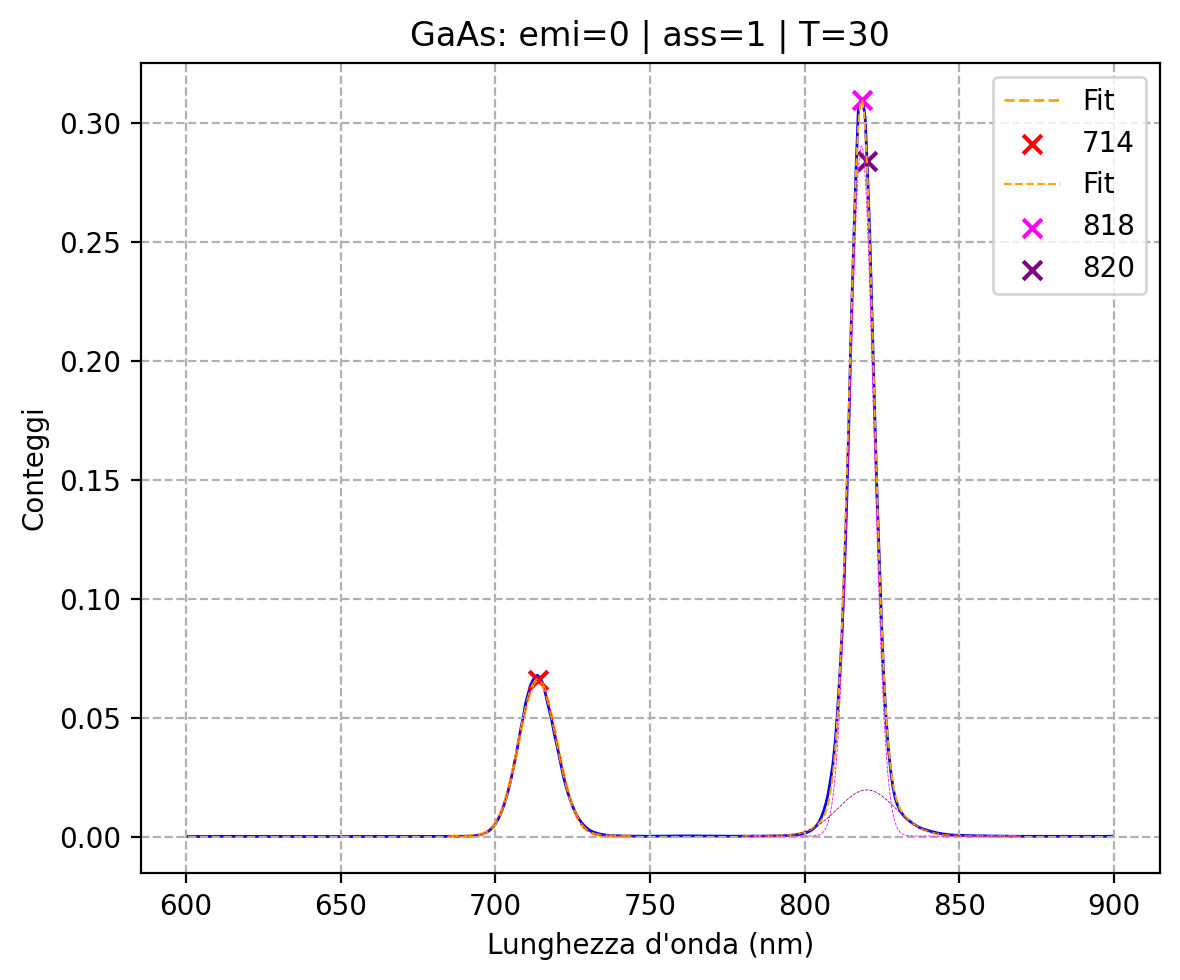

• Gaussiana  1 [red]
 - A = 0.015406487412434324
 - mu = 715.3412424074194 | 1.7332310721775048 eV
 - sigma = 7.107859706965217 | 0.01722193908368848 eV
 - chi2rid = 0.38702073999018716
• Gaussiana  2 [magenta]
 - A = 0.2857608642361999
 - mu = 819.0295848551715 | 1.514631248502845 eV
 - sigma = 3.9487588376316074 | 0.014866898361345233 eV
• Gaussiana  3 [purple]
 - A = 0.028172421895125997
 - mu = 818.5831830527369 | 1.5138057177383186 eV
 - sigma = 8.0348223336742 | 0.007298458830926686 eV
 - chi2rid = 13.669892645599427


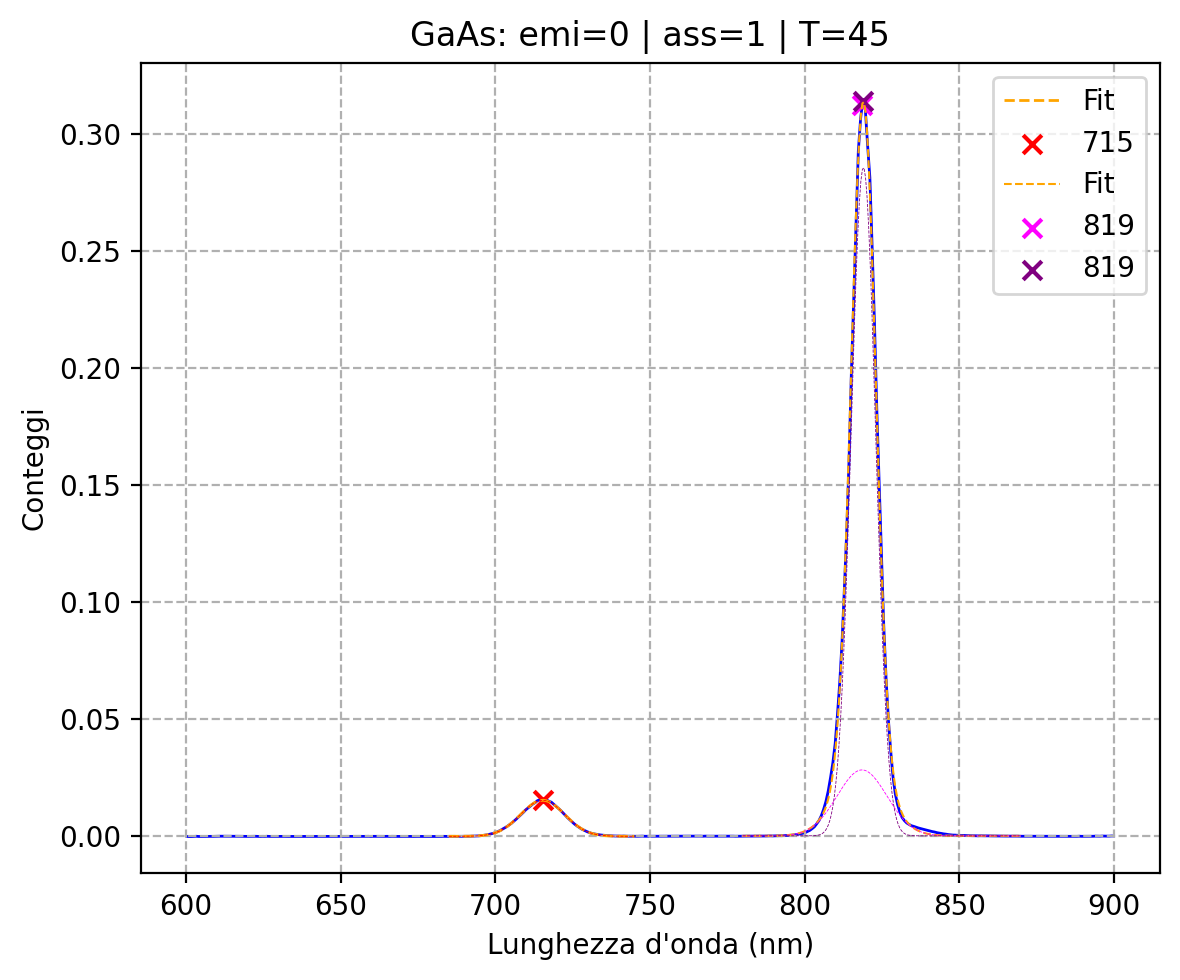

• Gaussiana  1 [red]
 - A = 0.0006596101514647477
 - mu = 713.3769839725121 | 1.7380034629745973 eV
 - sigma = 9.284700717761014 | 0.022620356925859498 eV
 - chi2rid = 0.18215072438687166
• Gaussiana  2 [magenta]
 - A = 0.24138615706040403
 - mu = 820.6679316130511 | 1.5147537198181054 eV
 - sigma = 4.142131159133164 | 0.014183210699610805 eV
• Gaussiana  3 [purple]
 - A = 0.06631415554204223
 - mu = 818.5169987233857 | 1.5107836200125777 eV
 - sigma = 7.66408354191129 | 0.007625330131837917 eV
 - chi2rid = 13.916890810519215


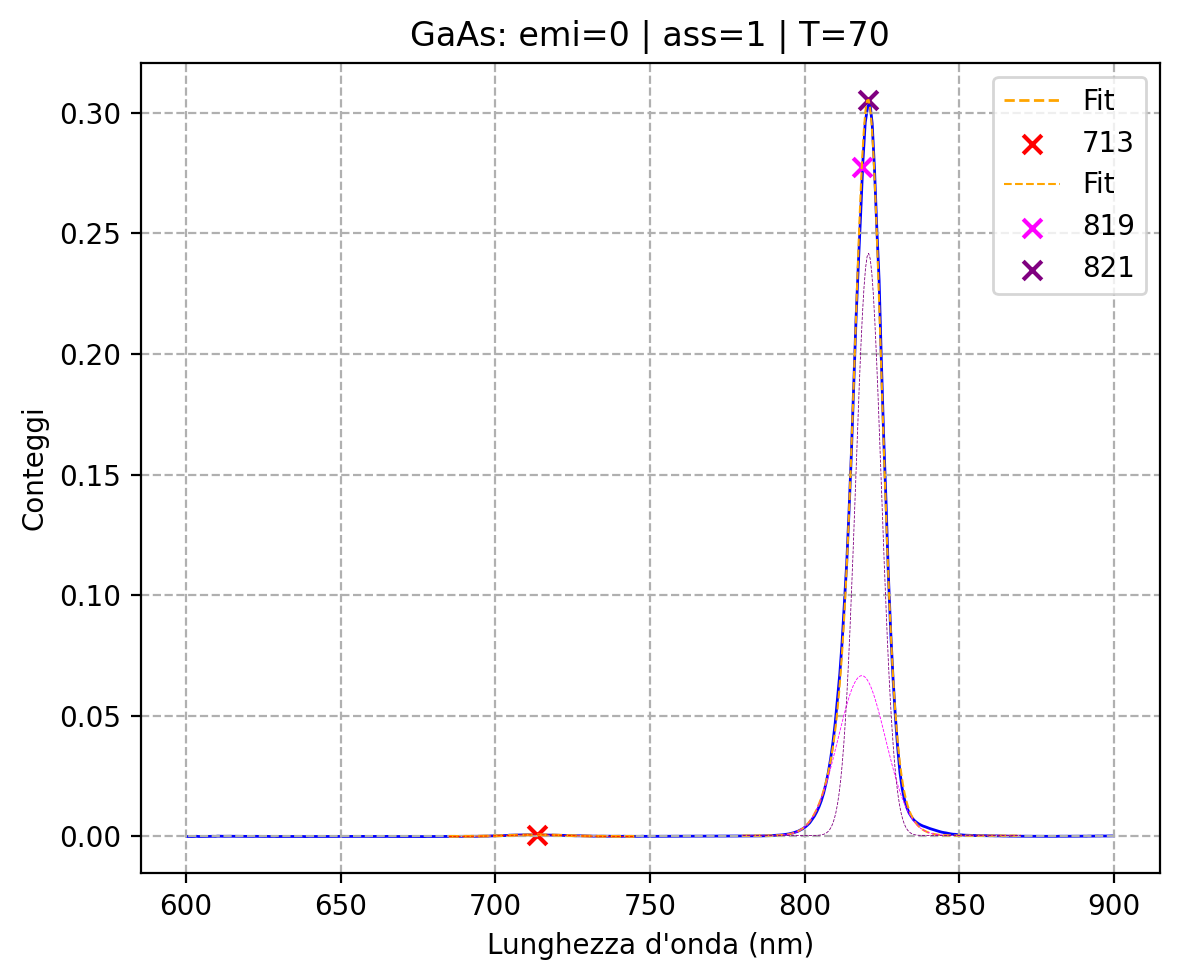

• Gaussiana  1 [magenta]
 - A = 0.056041728664295534
 - mu = 820.4239039715783 | 1.5112329888836975 eV
 - sigma = 9.098498183093543 | 0.016759568482862836 eV
• Gaussiana  2 [purple]
 - A = 0.13879944810798683
 - mu = 824.2713556955724 | 1.5041790060802664 eV
 - sigma = 4.649999921673685 | 0.008485594230742247 eV
 - chi2rid = 8.73745489066788


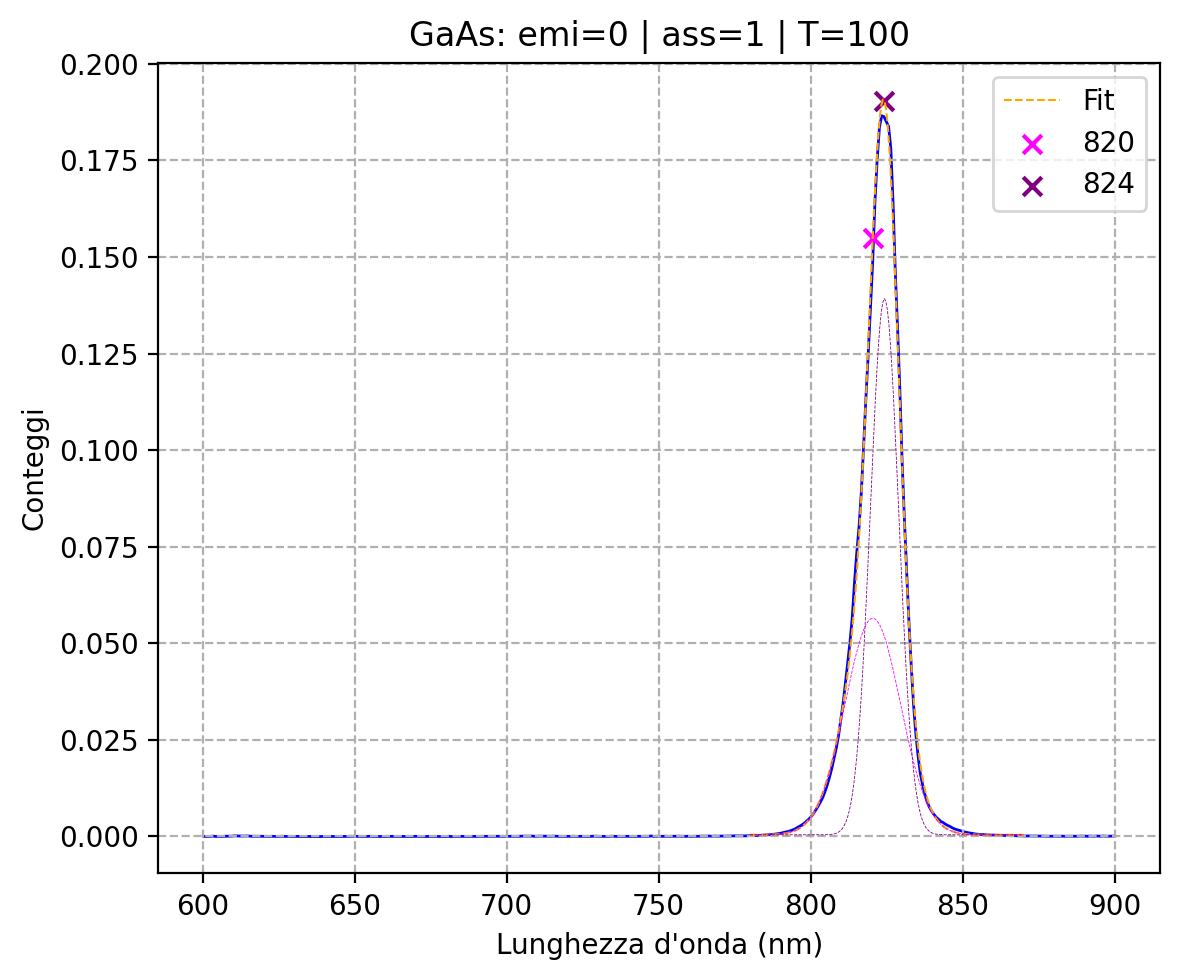

• Gaussiana  1 [magenta]
 - A = 0.06790299459654311
 - mu = 832.8068317128559 | 1.5026226346987537 eV
 - sigma = 5.883892044050918 | 0.02101219889522658 eV
• Gaussiana  2 [purple]
 - A = 0.029952911832656845
 - mu = 825.1251112020988 | 1.4887626053698 eV
 - sigma = 11.538288156760204 | 0.010518307626270953 eV
 - chi2rid = 4.880925538786519


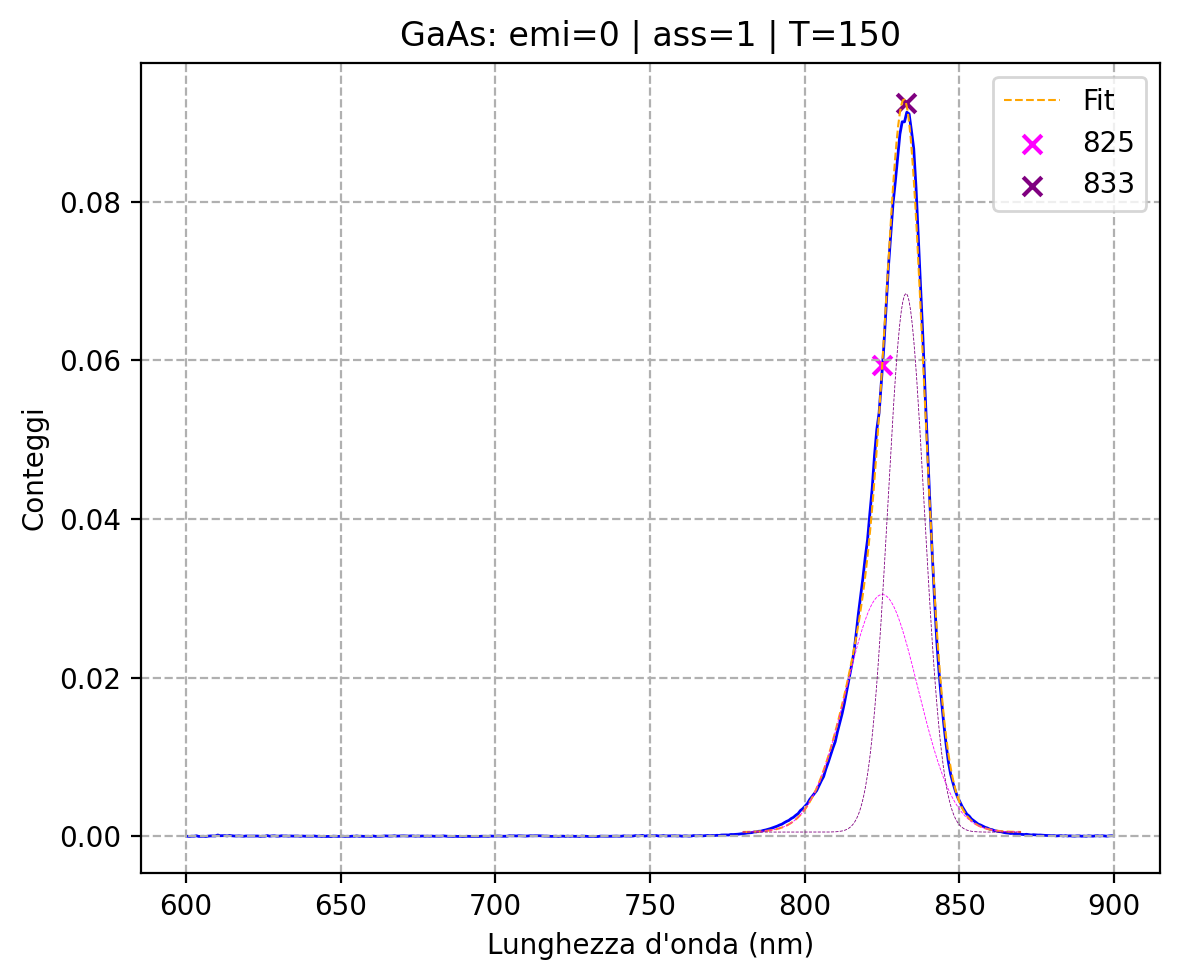

• Gaussiana  1 [red]
 - A = 0.0504942691705166
 - mu = 712.9503770046753 | 1.7390434293051358 eV
 - sigma = 5.454618757798626 | 0.013305019838781903 eV
 - chi2rid = 10.71045621788672
• Gaussiana  2 [magenta]
 - A = 0.08755104420888232
 - mu = 818.5707071065817 | 1.5146543332012556 eV
 - sigma = 3.345005047242312 | 0.006189479229344025 eV
• Gaussiana  3 [purple]
 - A = 0.013730874974123864
 - mu = 822.9440124187413 | 1.5066051272510166 eV
 - sigma = 7.552415586262641 | 0.013826588289950427 eV
 - chi2rid = 1.4433370778664427


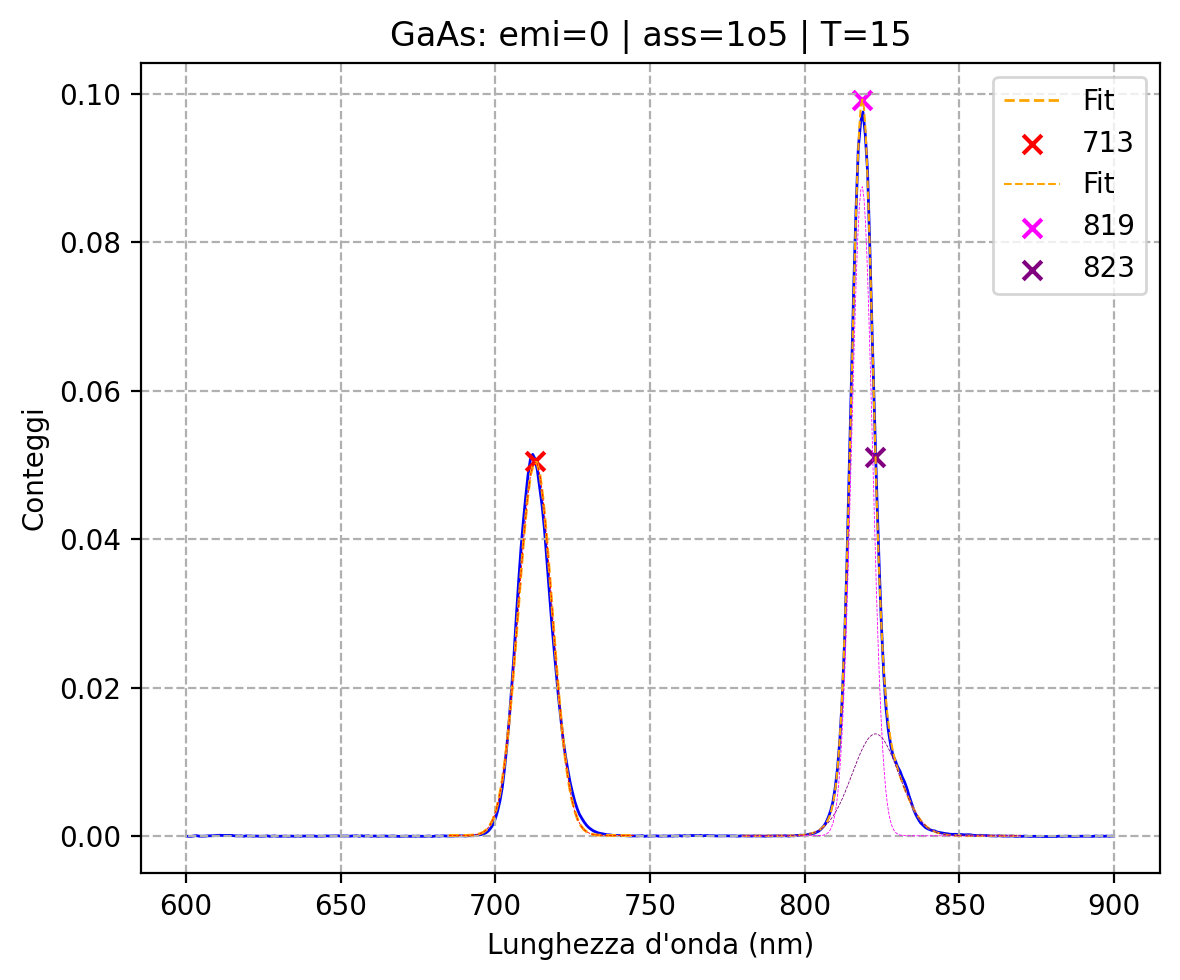

• Gaussiana  1 [red]
 - A = 0.025611964379952352
 - mu = 714.621649980776 | 1.7349763592859984 eV
 - sigma = 5.92667416430962 | 0.014388928133572365 eV
 - chi2rid = 2.0102525856234417
• Gaussiana  2 [magenta]
 - A = 0.10462571255479063
 - mu = 818.7088340654698 | 1.5143987910743035 eV
 - sigma = 3.6335547734976177 | 0.006721132992986644 eV
• Gaussiana  3 [purple]
 - A = 0.00399599253816873
 - mu = 821.3194468204812 | 1.5095851843644448 eV
 - sigma = 9.773301462166993 | 0.017963328576632877 eV
 - chi2rid = 1.63691401519735


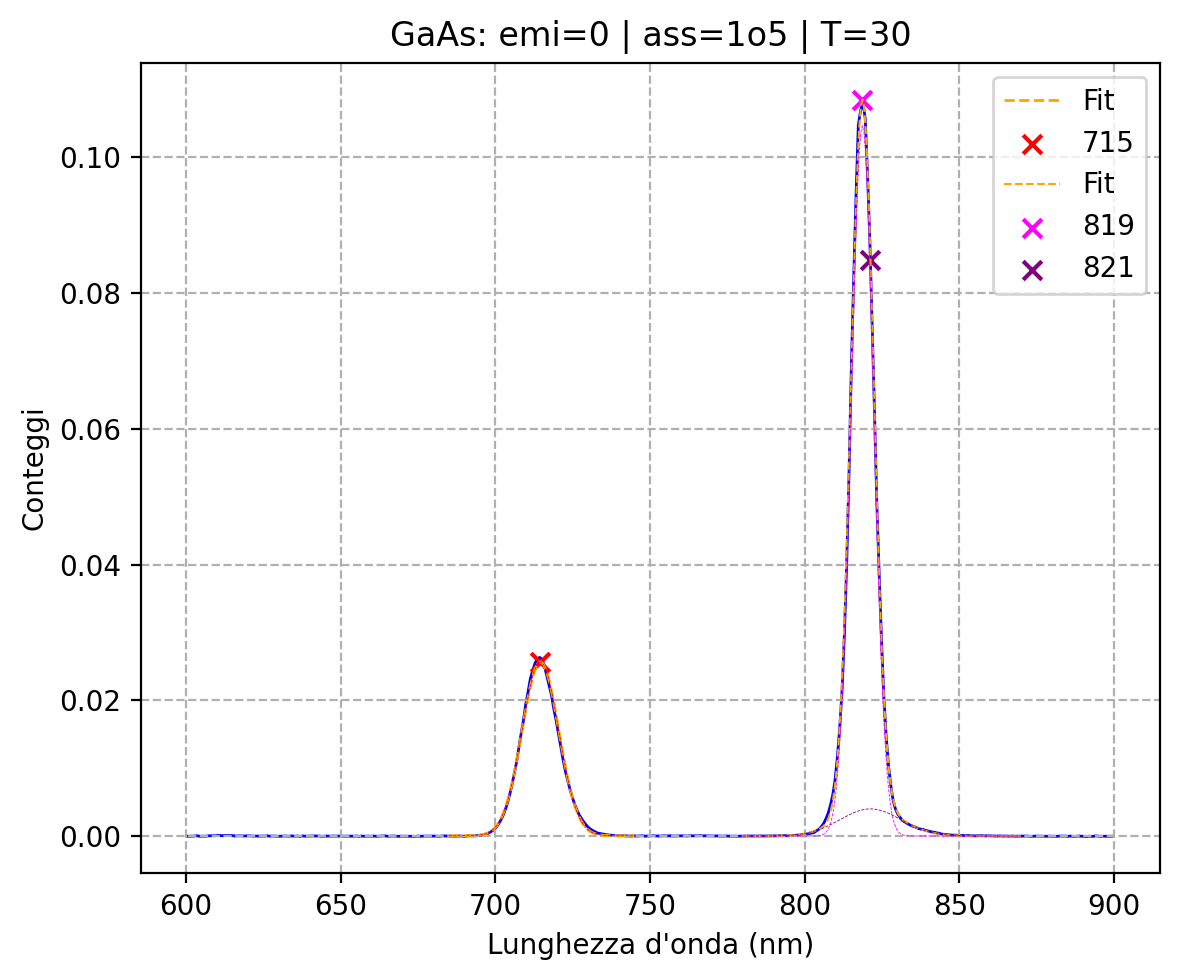

• Gaussiana  1 [red]
 - A = 0.002929173377345255
 - mu = 717.2841172986734 | 1.7285363479396996 eV
 - sigma = 7.095536755431667 | 0.017099072590783047 eV
 - chi2rid = 0.0991383912555222
• Gaussiana  2 [magenta]
 - A = 0.08910192282877905
 - mu = 819.1845185293553 | 1.5136279623105389 eV
 - sigma = 3.751625863548146 | 0.016363618285031196 eV
• Gaussiana  3 [purple]
 - A = 0.004236692852012321
 - mu = 819.1257689623928 | 1.5135194092491508 eV
 - sigma = 8.855453086551323 | 0.0069314768923062235 eV
 - chi2rid = 3.1382151513120493


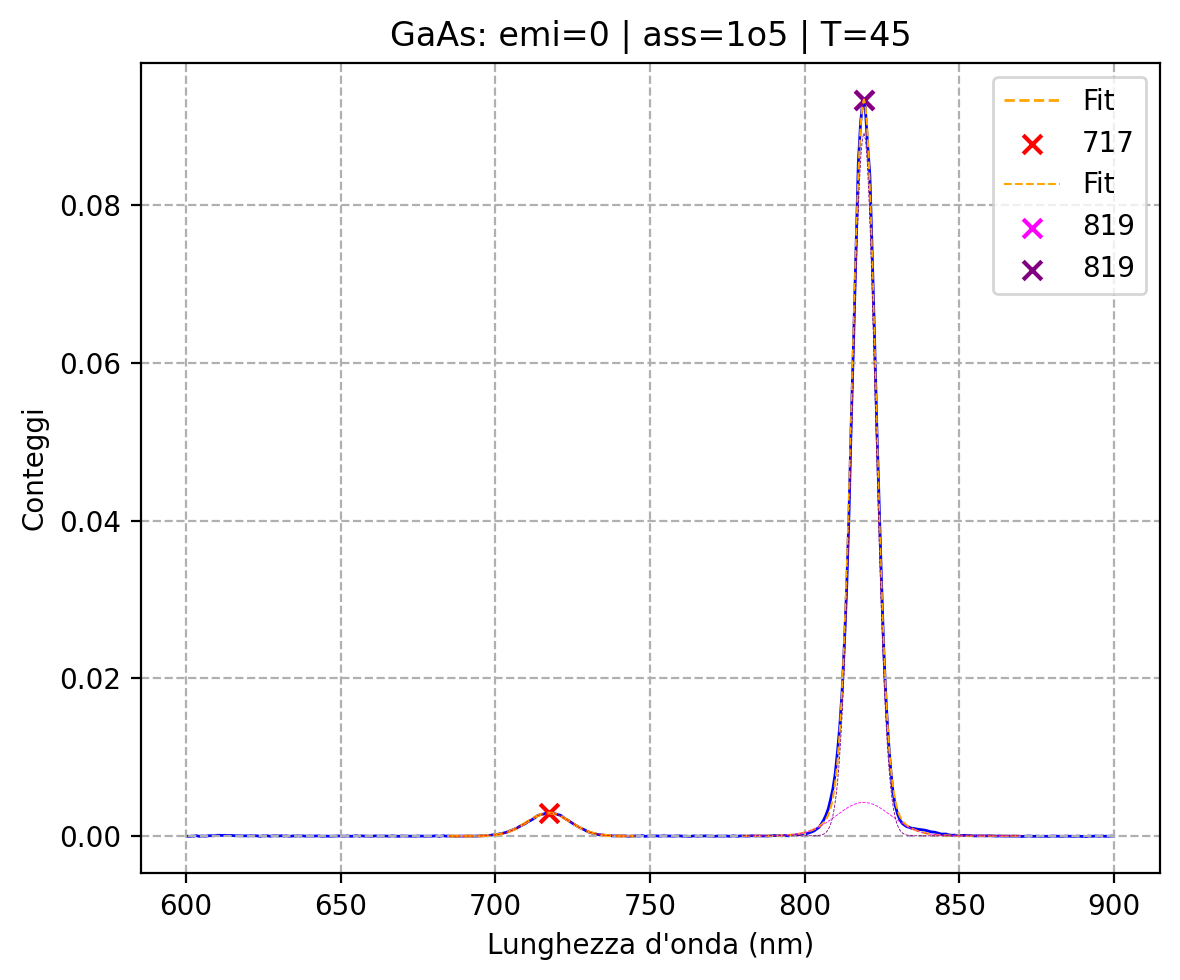

• Gaussiana  1 [red]
 - A = 0.0001716468564459842
 - mu = 713.0679190457718 | 1.7387567655683775 eV
 - sigma = 23.736481015724376 | 0.05787943315709155 eV
 - chi2rid = 0.14175556575759346
• Gaussiana  2 [magenta]
 - A = 0.06989050406732501
 - mu = 820.7956529444307 | 1.514914372737494 eV
 - sigma = 3.8077403374554746 | 0.013112080442746362 eV
• Gaussiana  3 [purple]
 - A = 0.017092135799997868
 - mu = 818.4301970217315 | 1.5105485319066865 eV
 - sigma = 7.08378161382804 | 0.007007562181880419 eV
 - chi2rid = 2.9587326028084964


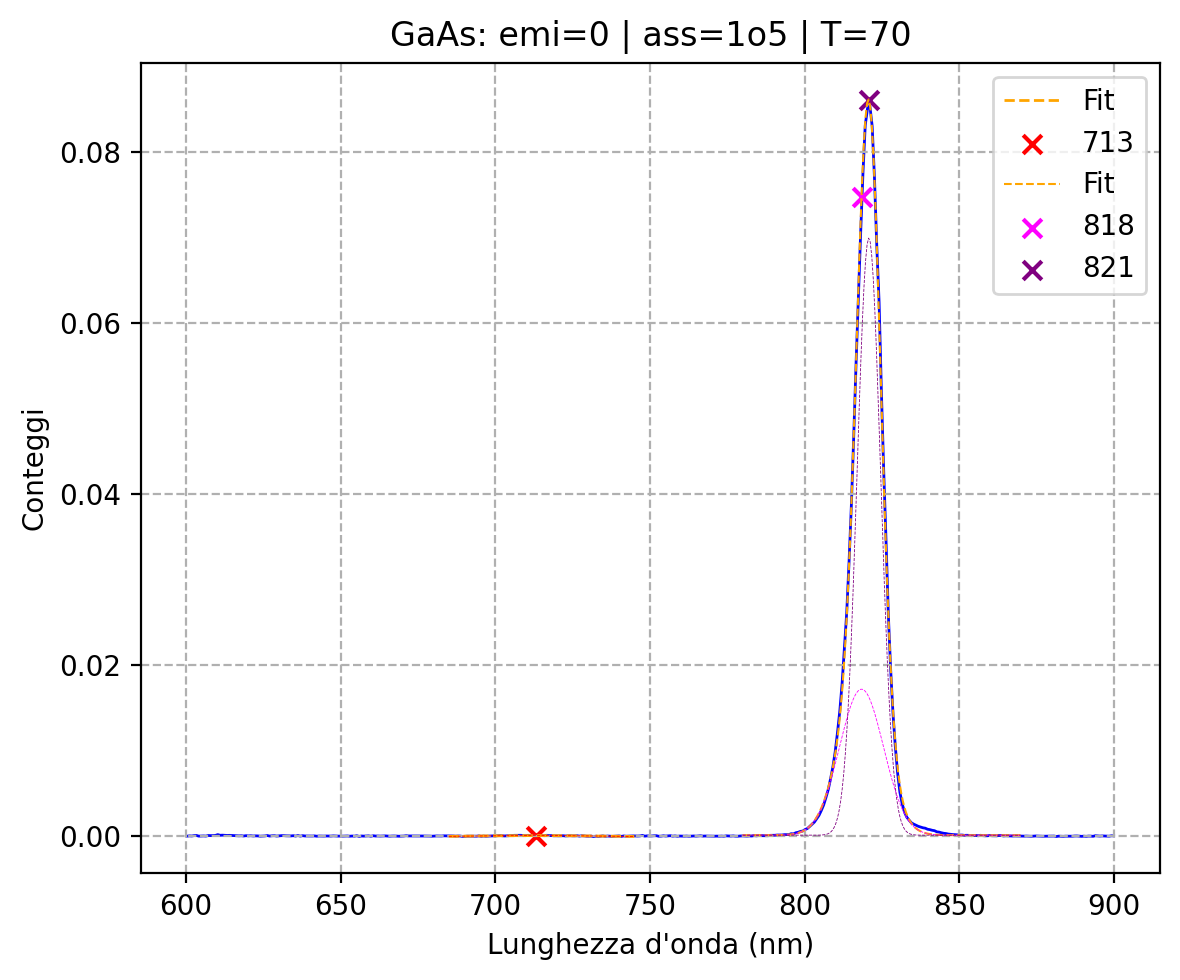

• Gaussiana  1 [magenta]
 - A = 0.011613201825539175
 - mu = 820.1827398470676 | 1.5116773473942944 eV
 - sigma = 8.452272958574081 | 0.01557836923982603 eV
• Gaussiana  2 [purple]
 - A = 0.03540618437760284
 - mu = 824.3577403094463 | 1.5040213828588376 eV
 - sigma = 4.148806343919077 | 0.007569399969790259 eV
 - chi2rid = 2.1320682253718903


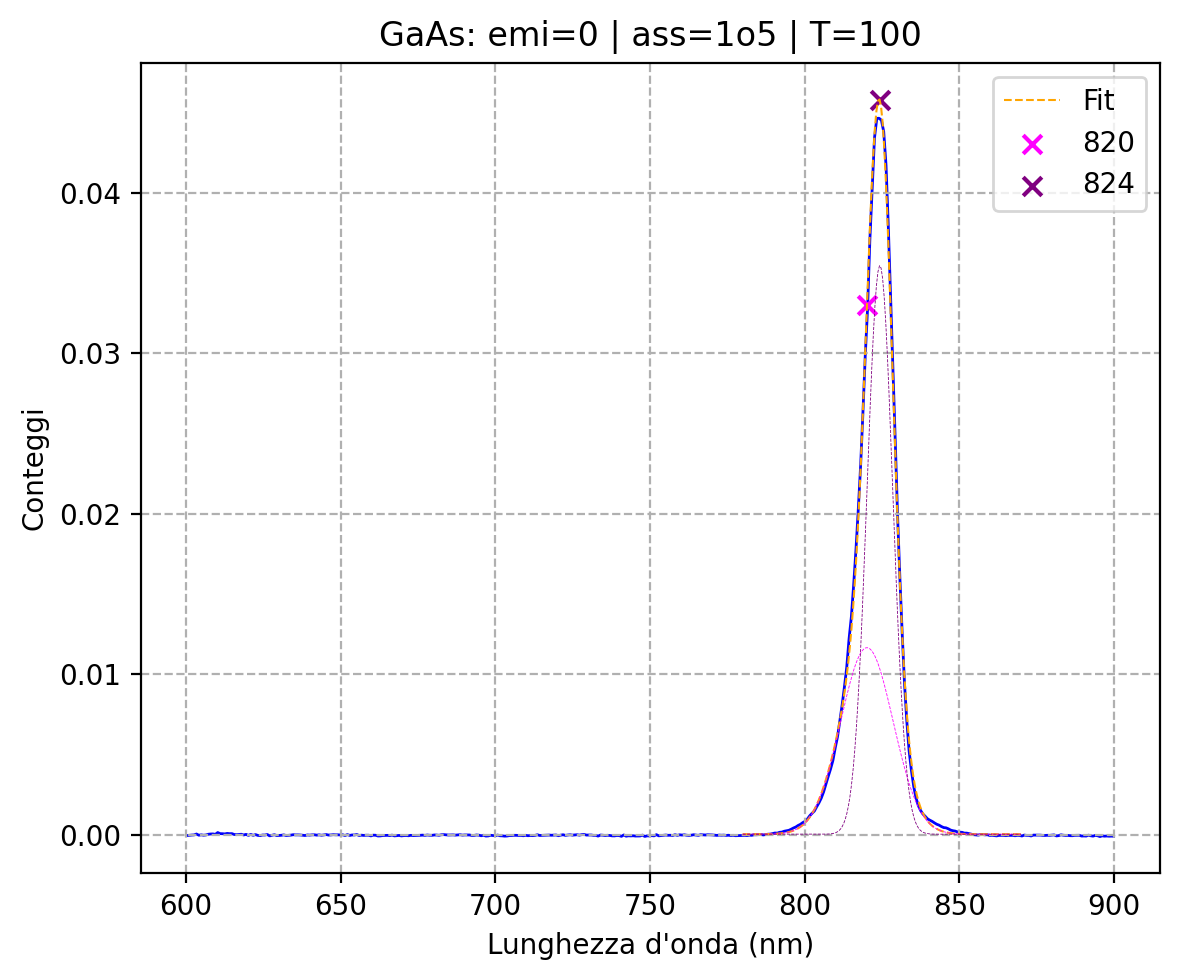

• Gaussiana  1 [magenta]
 - A = 0.013109683822385533
 - mu = 833.0068370435188 | 1.5021215936542425 eV
 - sigma = 4.986933245960921 | 0.018769332813956874 eV
• Gaussiana  2 [purple]
 - A = 0.005178098693834864
 - mu = 825.400336289945 | 1.4884051527728654 eV
 - sigma = 10.313554962544458 | 0.008910583694806778 eV
 - chi2rid = 1.0301155867937206


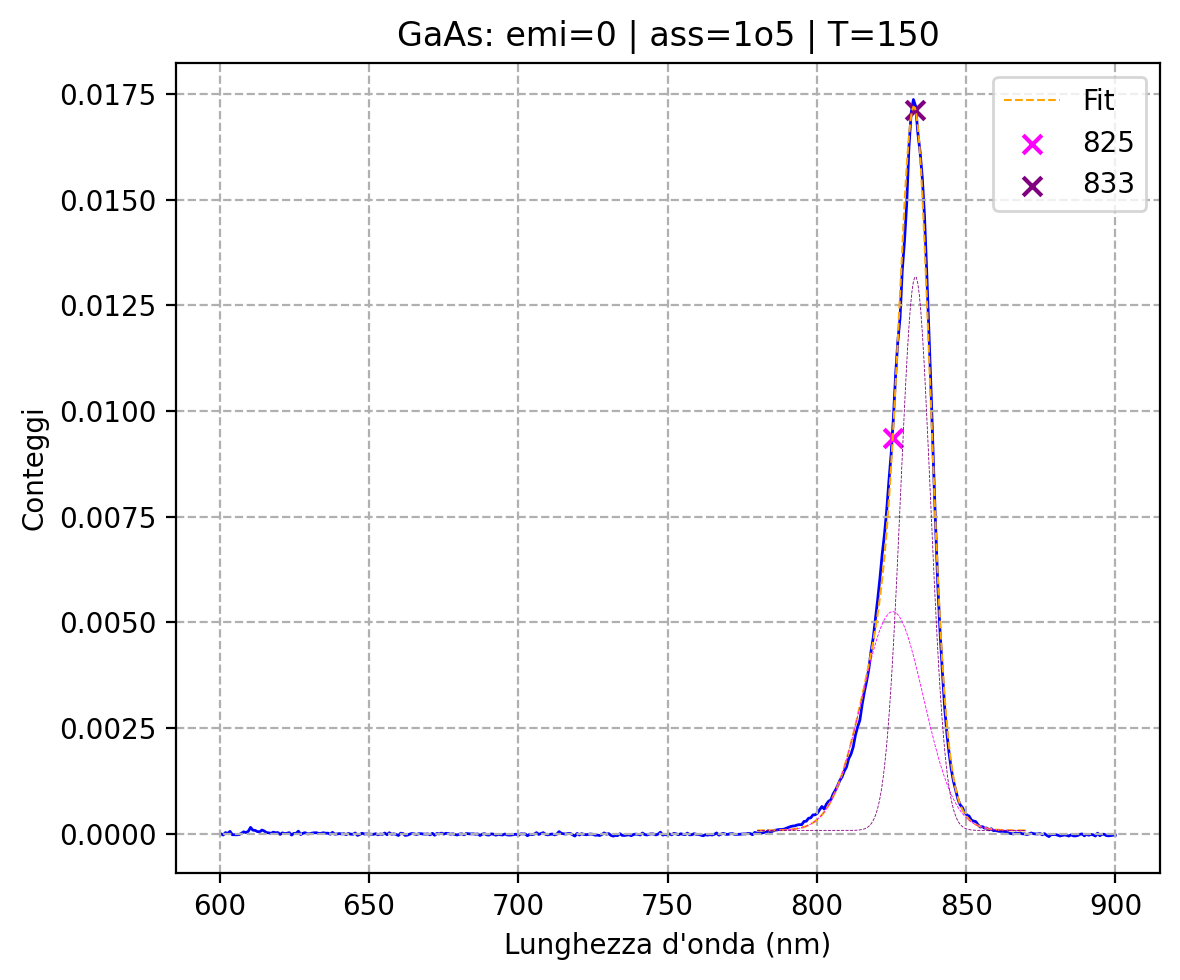

• Gaussiana  1 [red]
 - A = 0.018405542208483536
 - mu = 712.9471028381741 | 1.7390514157570305 eV
 - sigma = 5.332564870406856 | 0.013007422921812737 eV
 - chi2rid = 4.866690178790681
• Gaussiana  2 [magenta]
 - A = 0.028833465433562015
 - mu = 818.9143544079308 | 1.5140187272050003 eV
 - sigma = 3.2691903529380792 | 0.00604411852167949 eV
• Gaussiana  3 [purple]
 - A = 0.004605755750383181
 - mu = 824.5519642277679 | 1.5036671093395308 eV
 - sigma = 6.940193403557446 | 0.012656255768134724 eV
 - chi2rid = 0.6700290389894383


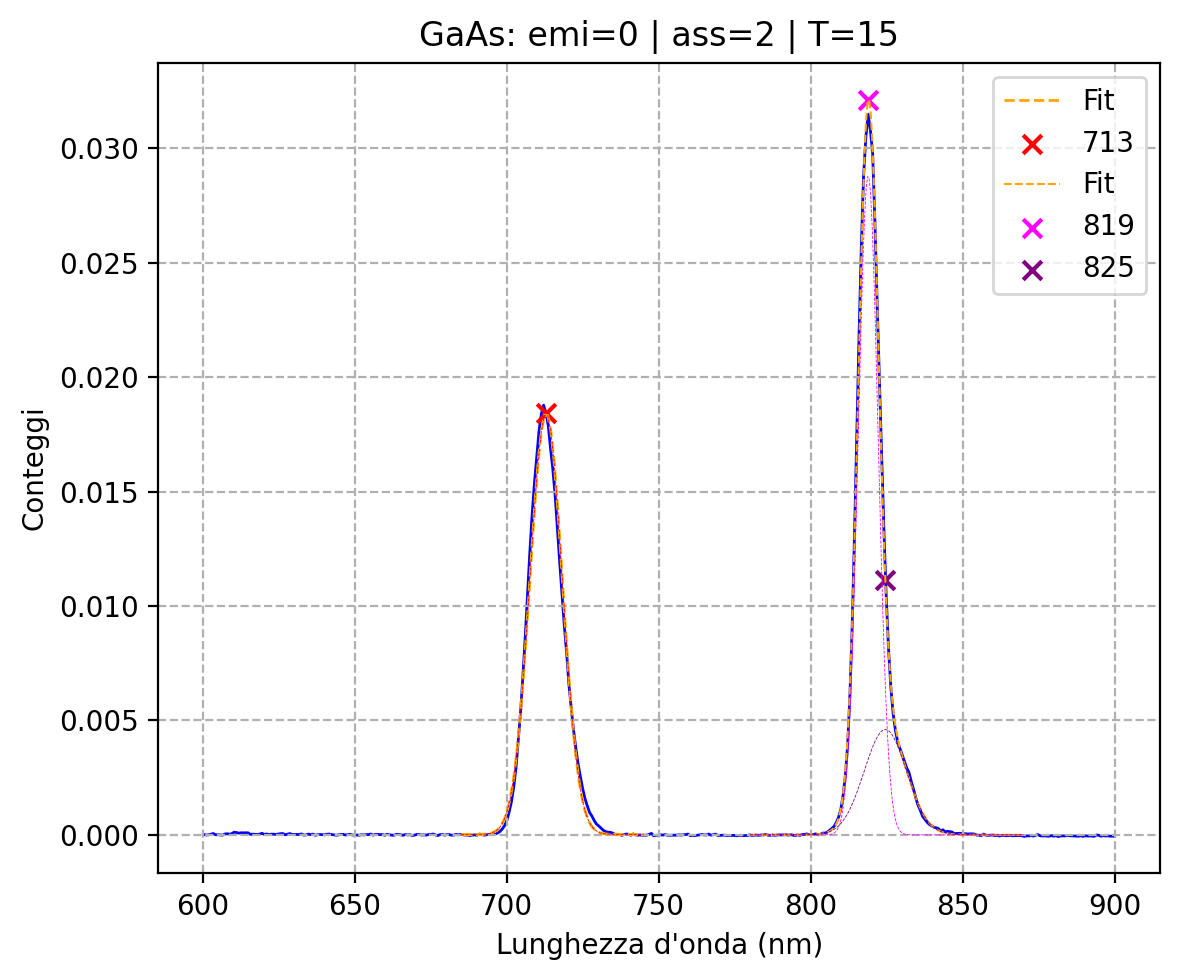

• Gaussiana  1 [red]
 - A = 0.007999760505992019
 - mu = 715.3591538789127 | 1.7331876747892527 eV
 - sigma = 5.7596941871658665 | 0.013954712009515884 eV
 - chi2rid = 0.47541088514324903
• Gaussiana  2 [magenta]
 - A = 0.03374652996221269
 - mu = 818.9830058498181 | 1.5138918142313187 eV
 - sigma = 3.5150691091366855 | 0.006497612664450359 eV
• Gaussiana  3 [purple]
 - A = 0.0009551612524715088
 - mu = 822.4801913361284 | 1.5074547467659334 eV
 - sigma = 9.670211322282706 | 0.017723716769790624 eV
 - chi2rid = 0.5353446883470026


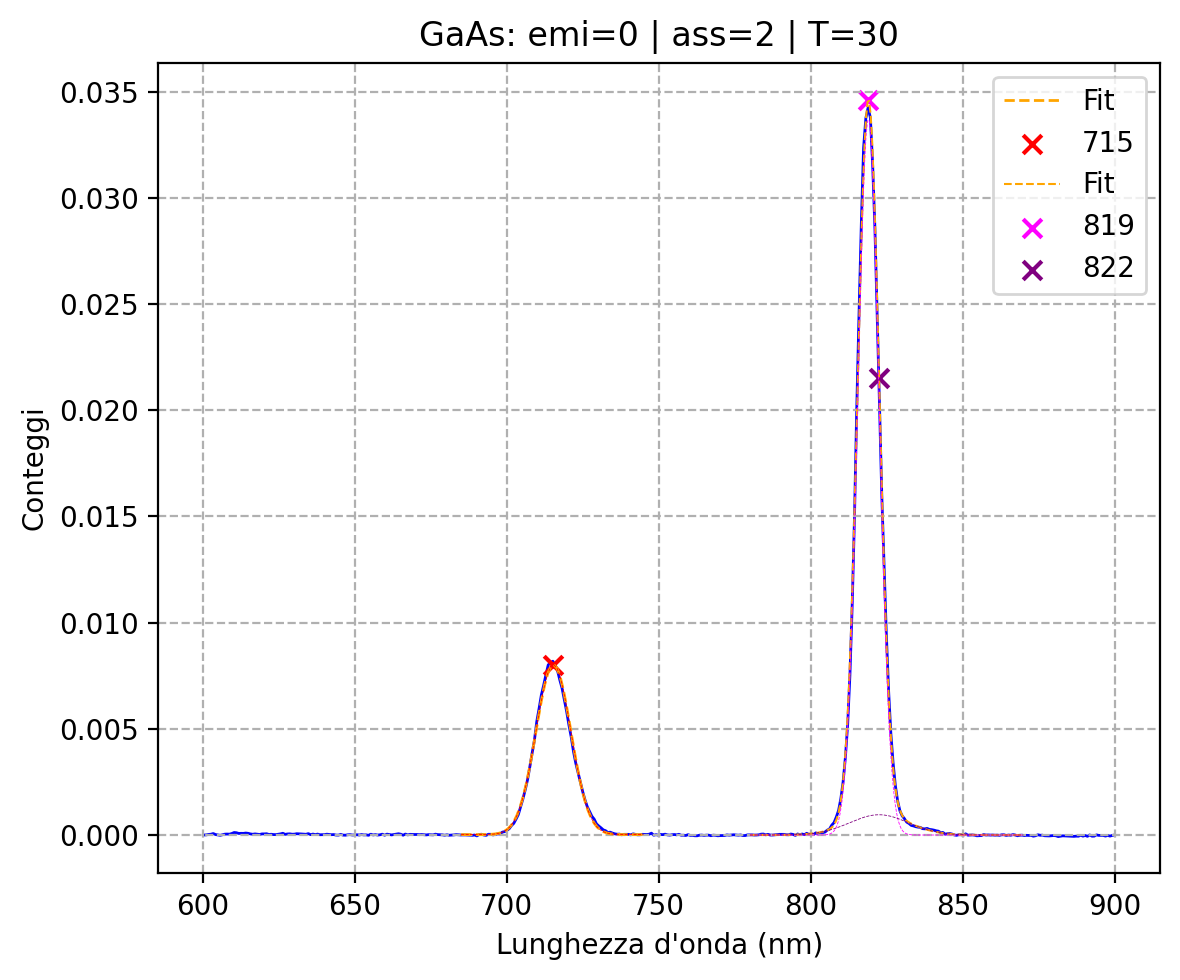

• Gaussiana  1 [red]
 - A = 0.000547444281221811
 - mu = 718.8710347413517 | 1.724720580787757 eV
 - sigma = 7.29691994318812 | 0.017506823051933504 eV
 - chi2rid = 0.06750487151967728
• Gaussiana  2 [magenta]
 - A = 0.027726428985247353
 - mu = 819.2767675017952 | 1.5141840959378354 eV
 - sigma = 3.627778303336402 | 0.01548317299682269 eV
• Gaussiana  3 [purple]
 - A = 0.0013446523840423758
 - mu = 818.8249182360331 | 1.5133489899039314 eV
 - sigma = 8.37283121462543 | 0.006701147705787363 eV
 - chi2rid = 0.9720836935118349


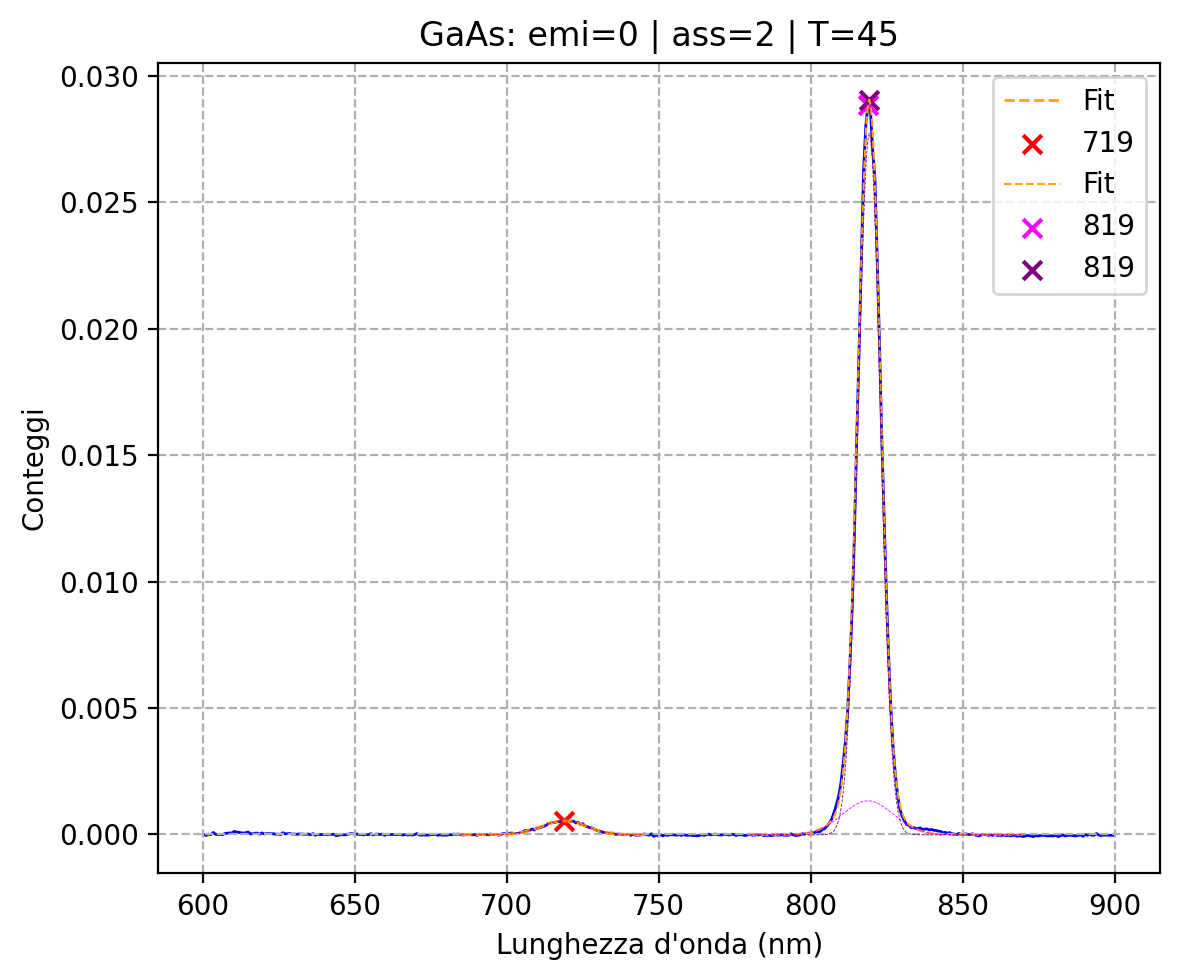

• Gaussiana  1 [red]
 - A = 5.096177667722644e-05
 - mu = 690.000000000663 | 1.796886476158563 eV
 - sigma = 106.20013892965322 | 0.27656462812850874 eV
 - chi2rid = 0.12106935768865833
• Gaussiana  2 [magenta]
 - A = 0.02080065491233671
 - mu = 820.83771049882 | 1.515327886103929 eV
 - sigma = 3.6389697964669963 | 0.012290632922995775 eV
• Gaussiana  3 [purple]
 - A = 0.004916778806052042
 - mu = 818.2068580143351 | 1.5104711353930689 eV
 - sigma = 6.6363723911843895 | 0.006696279629733812 eV
 - chi2rid = 0.6016759168420783


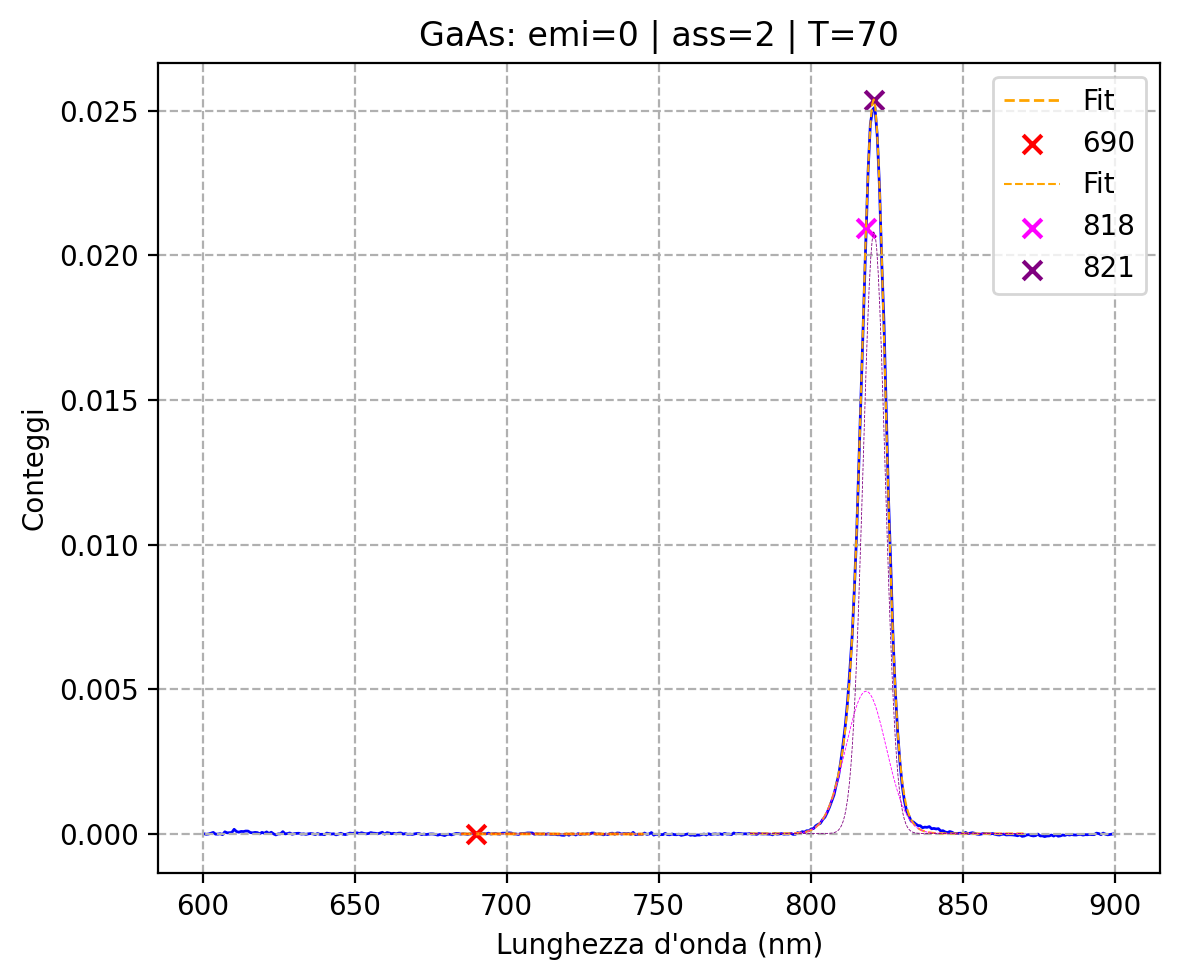

• Gaussiana  1 [magenta]
 - A = 0.003168605393561531
 - mu = 820.021306249003 | 1.51197494394629 eV
 - sigma = 7.958722849323045 | 0.014674483994852784 eV
• Gaussiana  2 [purple]
 - A = 0.010121802008699084
 - mu = 824.3817041600012 | 1.503977662645897 eV
 - sigma = 3.9403176131444217 | 0.007188599218050117 eV
 - chi2rid = 0.5097829672117874


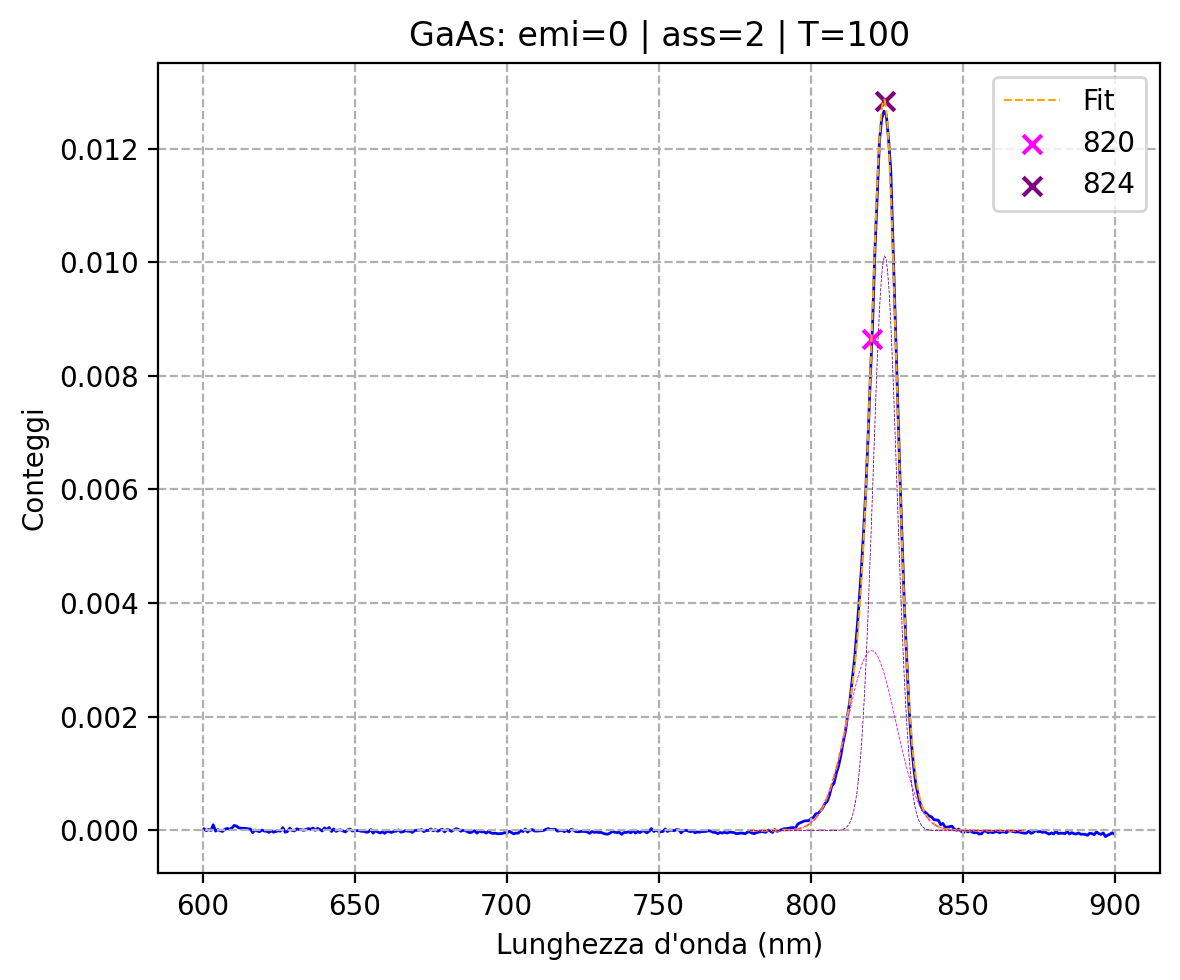

• Gaussiana  1 [magenta]
 - A = 0.06790299459654311
 - mu = 832.8068317128559 | 1.5026226346987537 eV
 - sigma = 5.883892044050918 | 0.02101219889522658 eV
• Gaussiana  2 [purple]
 - A = 0.029952911832656845
 - mu = 825.1251112020988 | 1.4887626053698 eV
 - sigma = 11.538288156760204 | 0.010518307626270953 eV
 - chi2rid = 4.880925538786519


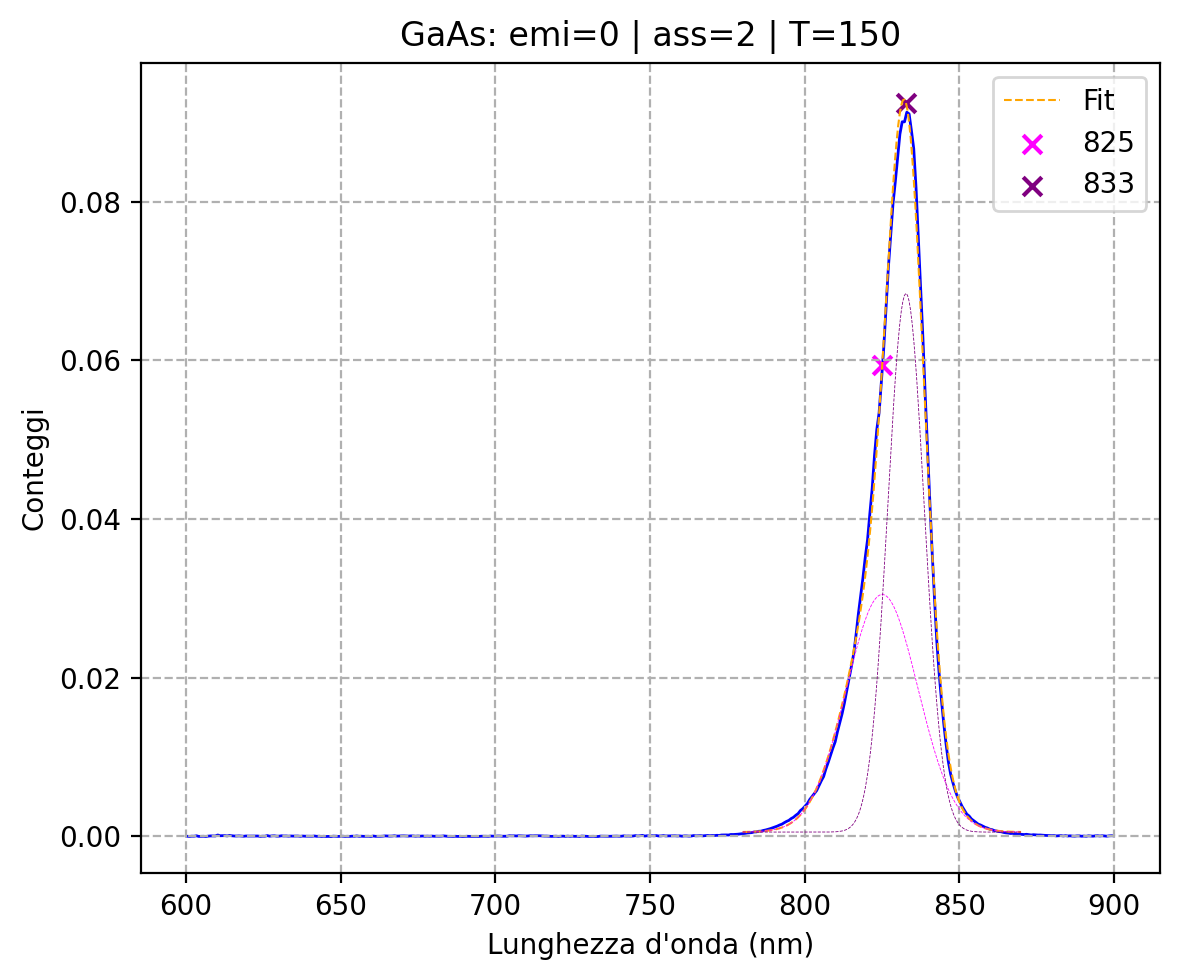

• Gaussiana  1 [red]
 - A = 0.005407619611466848
 - mu = 712.8743840617599 | 1.7392288126363442 eV
 - sigma = 5.2600844164933935 | 0.012833243245379627 eV
 - chi2rid = 1.2342362441055736
• Gaussiana  2 [magenta]
 - A = 0.007710270770676105
 - mu = 819.529747115418 | 1.5128818360951894 eV
 - sigma = 3.271117923927014 | 0.0060386031236247745 eV
• Gaussiana  3 [purple]
 - A = 0.0014710193040371545
 - mu = 826.2981192375163 | 1.5004895202892374 eV
 - sigma = 5.941233511749233 | 0.010788792101084806 eV
 - chi2rid = 0.5129901055355999


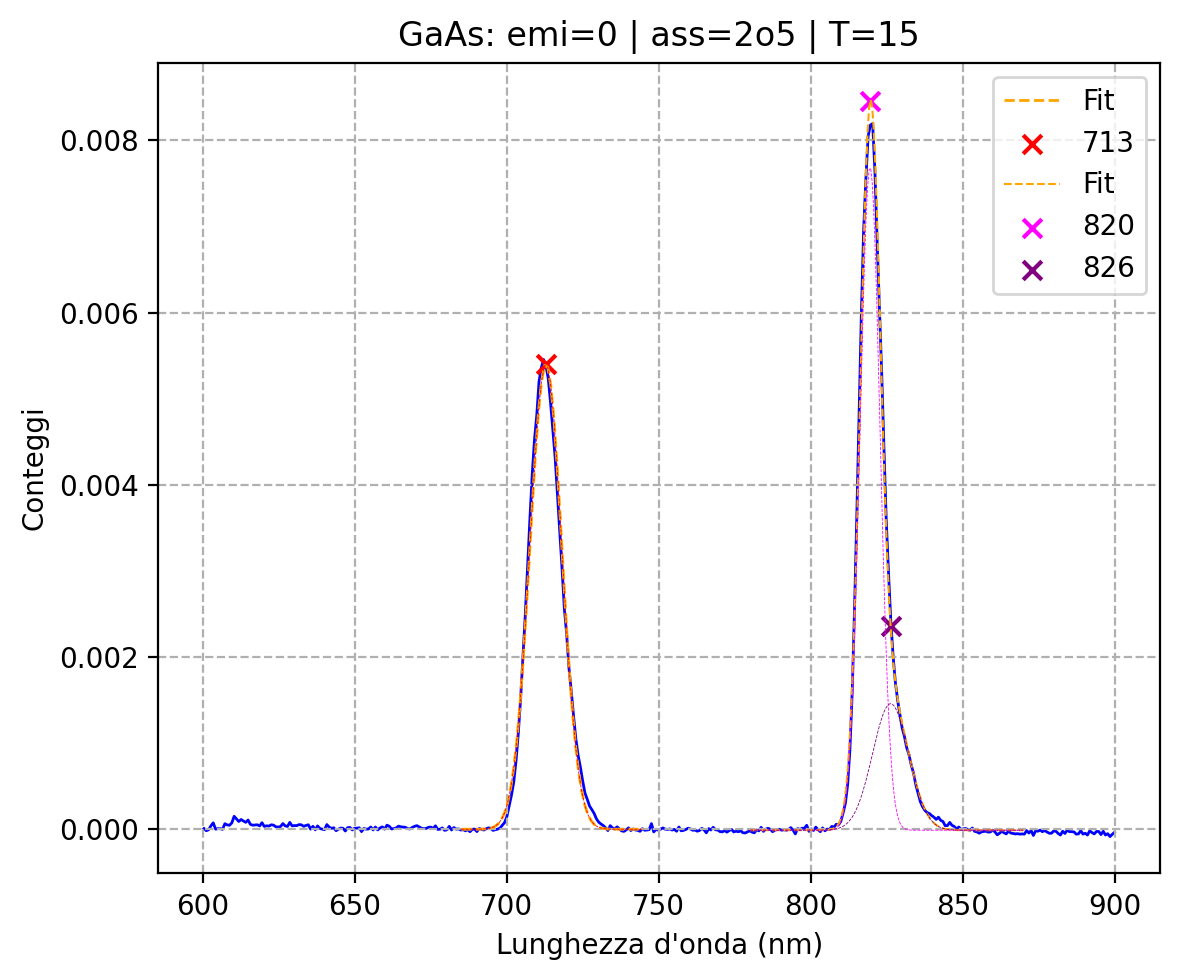

• Gaussiana  1 [red]
 - A = 0.001709267856997438
 - mu = 716.2292819570945 | 1.7310820707619057 eV
 - sigma = 5.708771463246433 | 0.013797749093837117 eV
 - chi2rid = 0.13714103815777126
• Gaussiana  2 [magenta]
 - A = 0.008556058312948988
 - mu = 819.3177425351652 | 1.5132733055605536 eV
 - sigma = 3.4790646632405093 | 0.006425804556496487 eV
• Gaussiana  3 [purple]
 - A = 0.00023716658794820173
 - mu = 826.2476626326248 | 1.5005811509349785 eV
 - sigma = 10.624503033612124 | 0.019295581350864975 eV
 - chi2rid = 0.4089137791870301


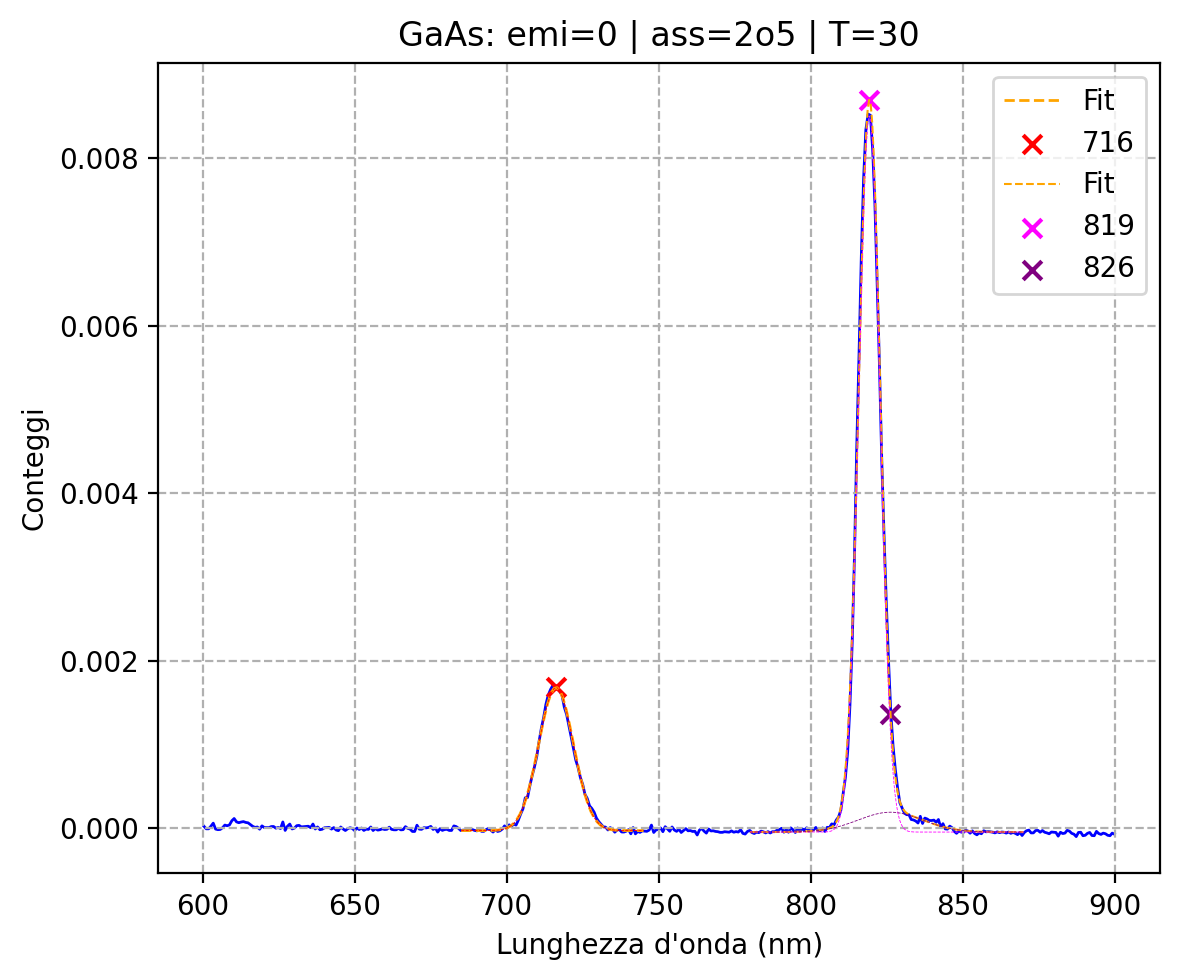

• Gaussiana  1 [red]
 - A = 8.929150483176969e-05
 - mu = 718.4260709577028 | 1.7257888023158836 eV
 - sigma = 7.720368827923686 | 0.01854571627003738 eV
 - chi2rid = 0.07069849952236097
• Gaussiana  2 [magenta]
 - A = 0.006710974884305859
 - mu = 819.3468565022384 | 1.513219534207382 eV
 - sigma = 3.656096753109596 | 0.0067523015214527886 eV
• Gaussiana  3 [purple]
 - A = 0.00016404989763671744
 - mu = 820.100103587067 | 1.5118296694849391 eV
 - sigma = 12.740447849481521 | 0.02348662922626596 eV
 - chi2rid = 0.20073042170131036


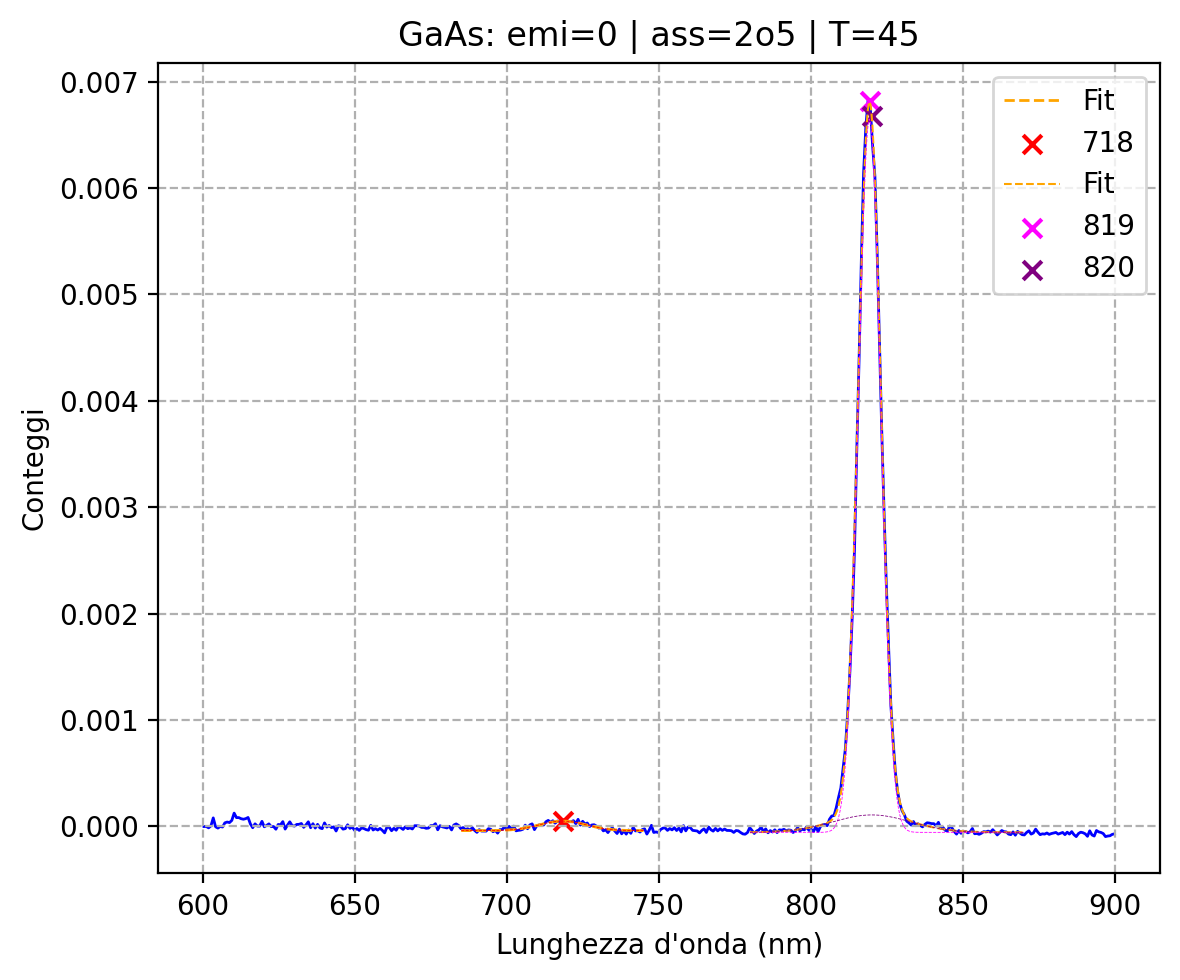

• Gaussiana  1 [red]
 - A = 1.7252708650650873e-05
 - mu = 704.009678854642 | 1.7611287256273562 eV
 - sigma = 6.0168938108067875 | 0.015051674497573445 eV
 - chi2rid = 0.17611038527253642
• Gaussiana  2 [magenta]
 - A = 0.003885812392934055
 - mu = 820.8799282352044 | 1.5154465344760648 eV
 - sigma = 3.5932971979165855 | 0.0112967053639218 eV
• Gaussiana  3 [purple]
 - A = 0.0009579451915641198
 - mu = 818.1427984057872 | 1.5103934520803008 eV
 - sigma = 6.098742468931769 | 0.006611554713951585 eV
 - chi2rid = 0.09983497309369539


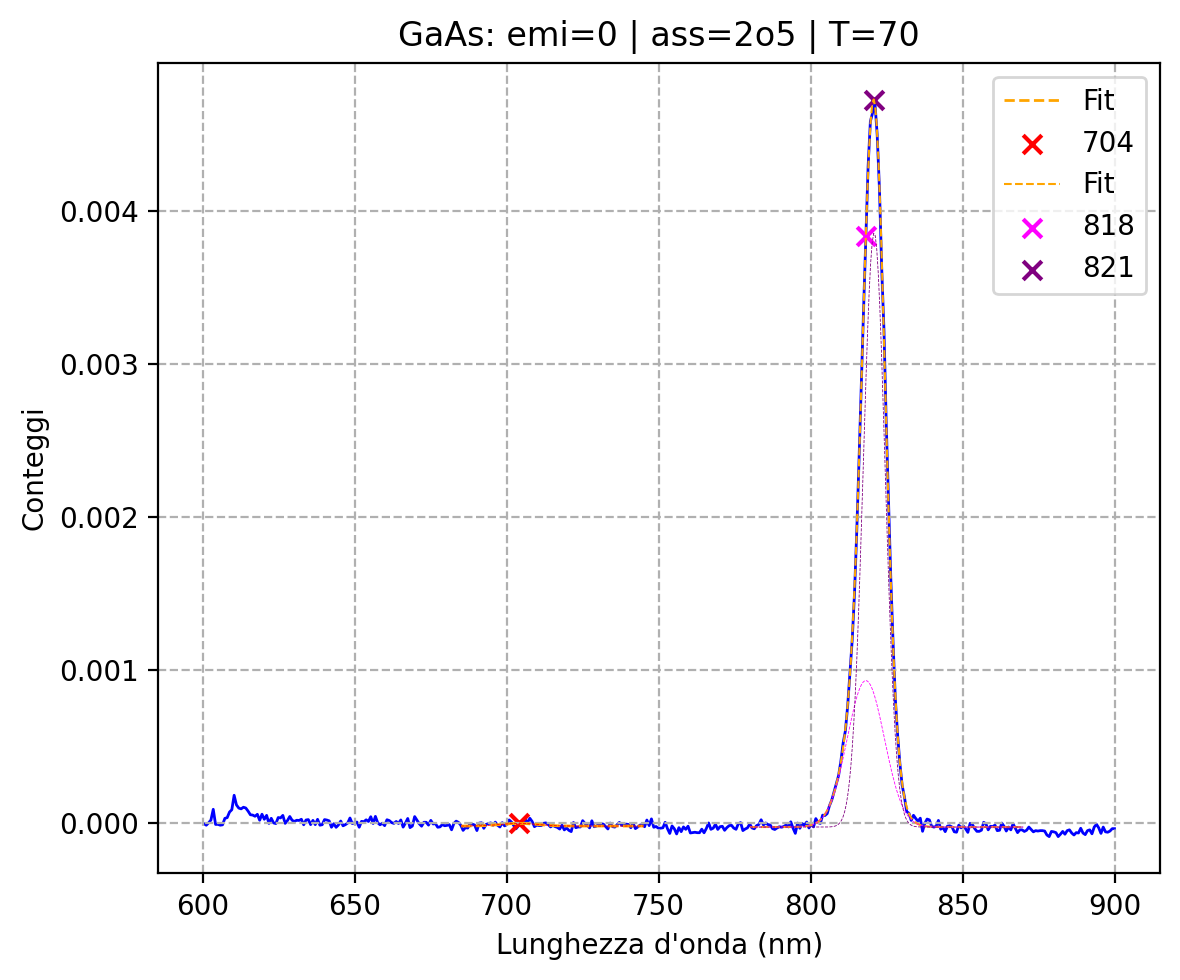

• Gaussiana  1 [magenta]
 - A = 0.0005994523031399997
 - mu = 819.1701849218252 | 1.5135458923824492 eV
 - sigma = 7.534005602871406 | 0.013920261556517205 eV
• Gaussiana  2 [purple]
 - A = 0.0020311130387052497
 - mu = 824.4159262087182 | 1.5039152315413973 eV
 - sigma = 3.822384057464603 | 0.006972865785427171 eV
 - chi2rid = 0.15562810781311082


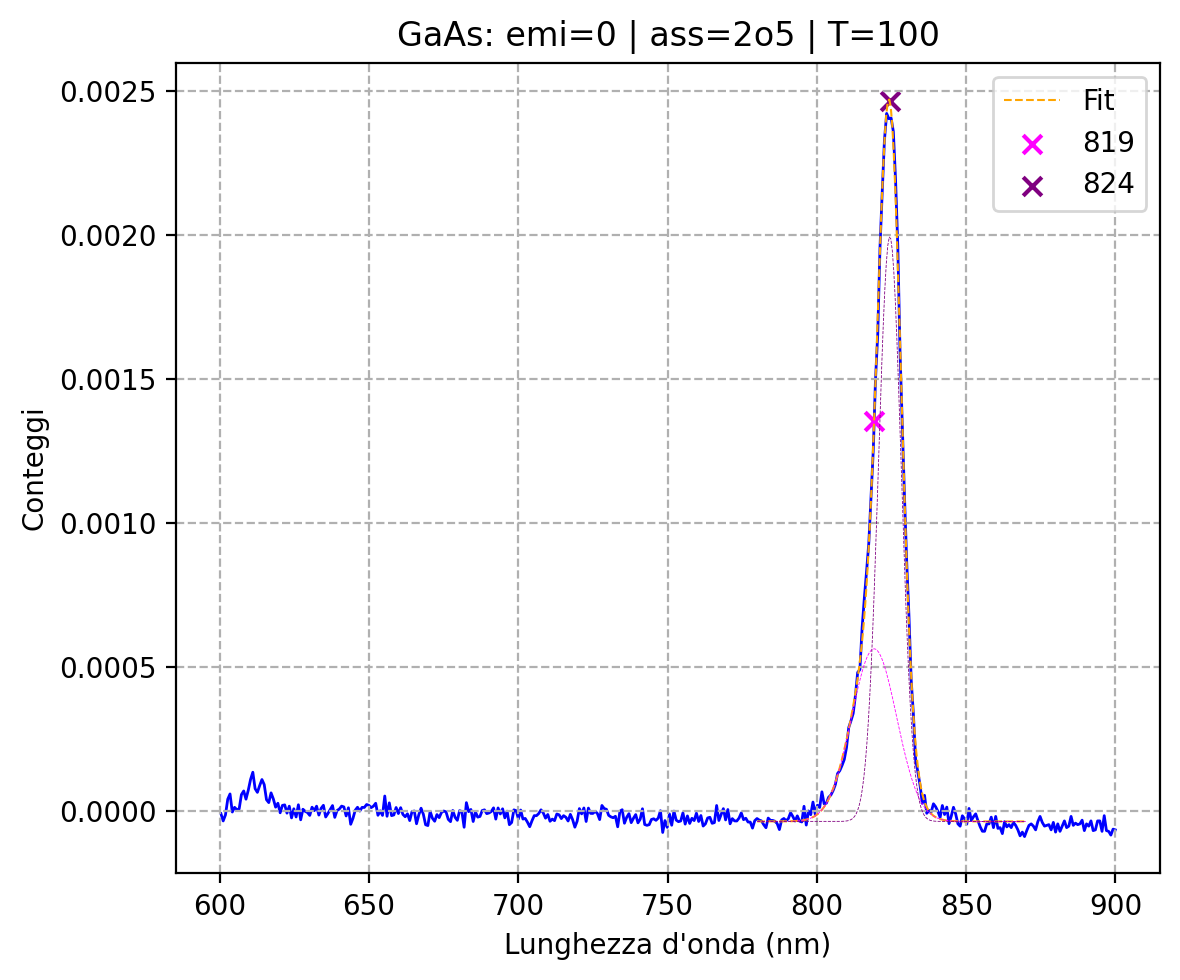

• Gaussiana  1 [magenta]
 - A = 0.00011764909357475509
 - mu = 824.7446977259042 | 1.5033157193605293 eV
 - sigma = 6.941904553321432 | 0.012653460235735643 eV
• Gaussiana  2 [purple]
 - A = 0.0003119072581035052
 - mu = 833.2961471313193 | 1.4878883969629244 eV
 - sigma = 4.473177281904272 | 0.007987062700596721 eV
 - chi2rid = 0.11264525320880284


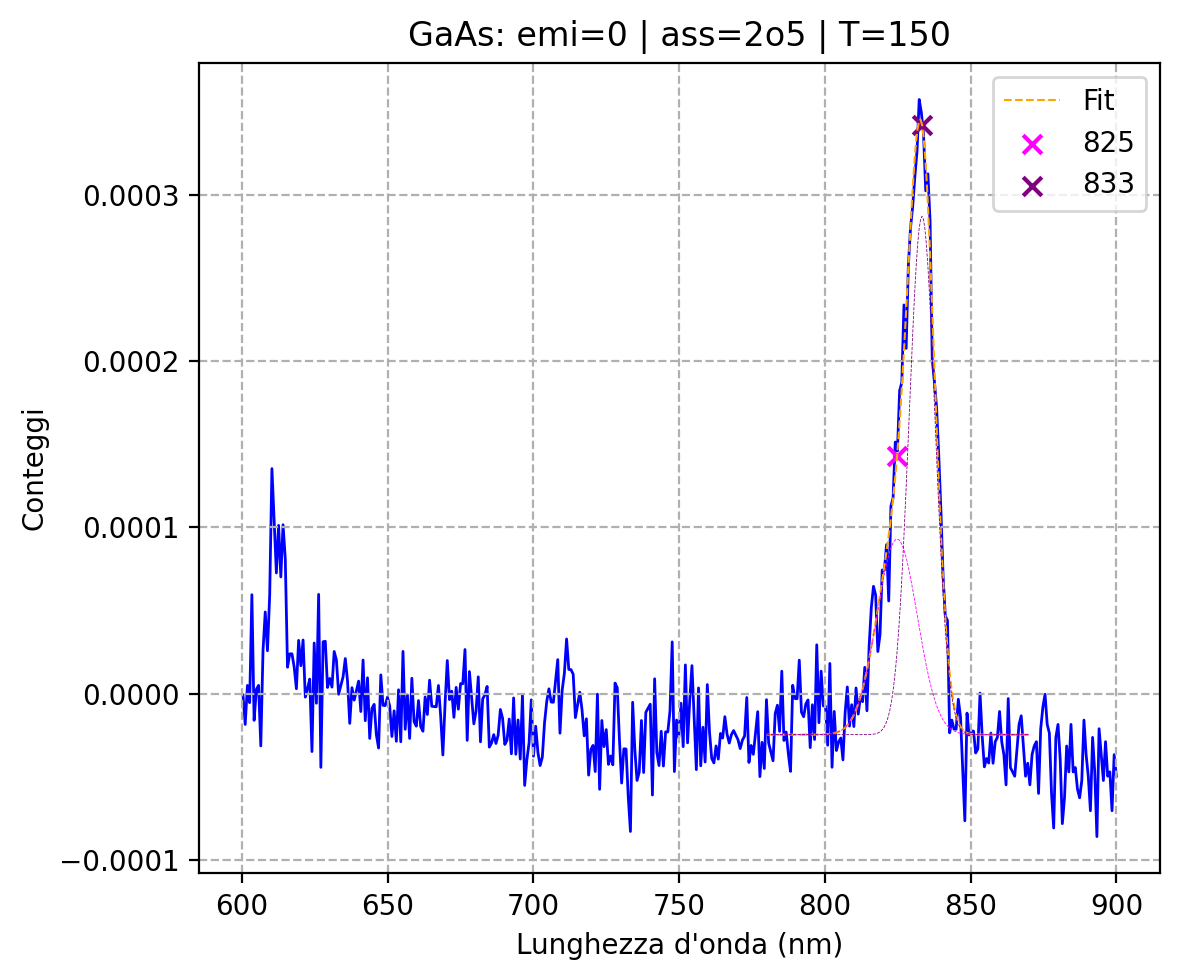

• Gaussiana  1 [red]
 - A = 0.0016025750593374594
 - mu = 712.7845516268486 | 1.7394480081264125 eV
 - sigma = 5.111820044303275 | 0.012474660363597413 eV
 - chi2rid = 0.23544282008683012
• Gaussiana  2 [magenta]
 - A = 0.0019584620067053617
 - mu = 820.2740068923574 | 1.5115091519818238 eV
 - sigma = 3.3622356322614317 | 0.0061955515920053454 eV
• Gaussiana  3 [purple]
 - A = 0.0005710375950307205
 - mu = 825.9942161136541 | 1.5010415864461697 eV
 - sigma = 5.172733992551636 | 0.009400173375276237 eV
 - chi2rid = 0.18757650951313096


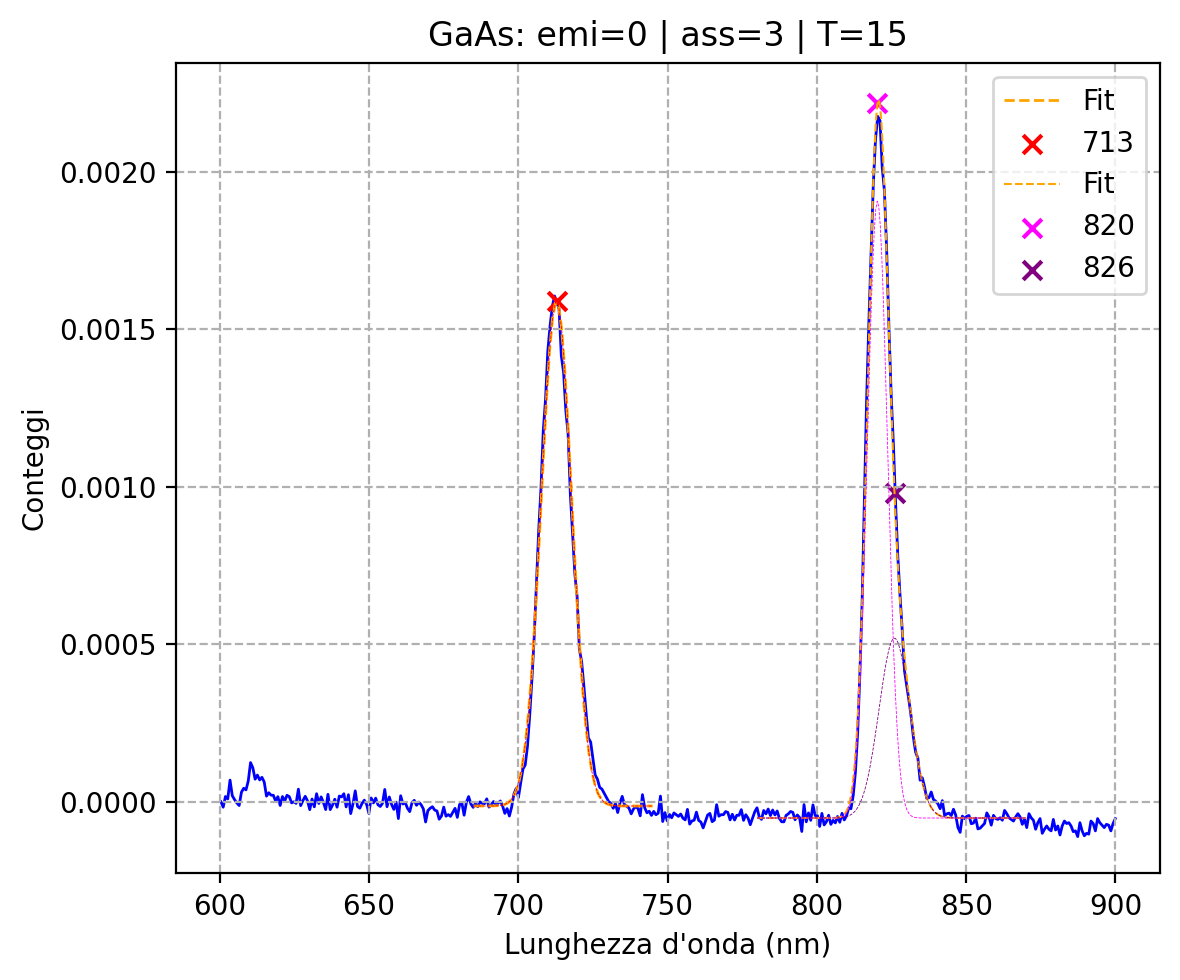

• Gaussiana  1 [red]
 - A = 0.00039115211506973437
 - mu = 716.9273235911759 | 1.7293965897966235 eV
 - sigma = 5.79155688723986 | 0.01397059144047532 eV
 - chi2rid = 0.06866629486423381
• Gaussiana  2 [magenta]
 - A = 0.0024285222674121742
 - mu = 819.4786099605205 | 1.512976243041086 eV
 - sigma = 3.4870157839248446 | 0.00643796186509584 eV
• Gaussiana  3 [purple]
 - A = 7.202379426518509e-05
 - mu = 826.0113847325844 | 1.5010103873471352 eV
 - sigma = 10.507042781647977 | 0.01909317552646101 eV
 - chi2rid = 0.1798484218139414


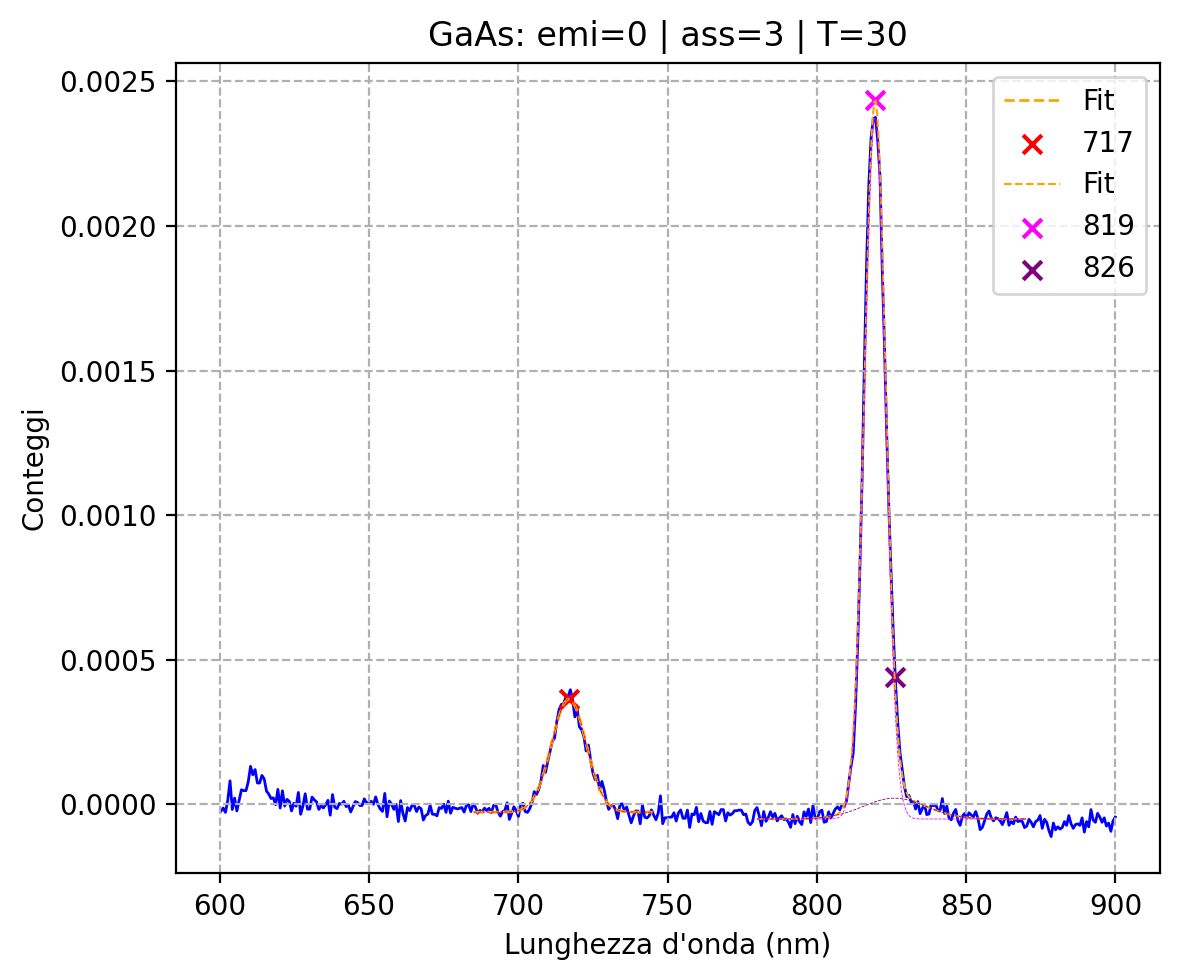

• Gaussiana  1 [red]
 - A = 1.9547248315883725e-05
 - mu = 712.3905779611802 | 1.740409975801452 eV
 - sigma = 16.547922055496574 | 0.04042749794164248 eV
 - chi2rid = 0.17332910056953726
• Gaussiana  2 [magenta]
 - A = 0.0018488583107315823
 - mu = 819.3861219802882 | 1.5176697048556769 eV
 - sigma = 3.63574457192929 | 0.020317010337692478 eV
• Gaussiana  3 [purple]
 - A = 6.544549869125667e-05
 - mu = 816.944335505797 | 1.5131470198129946 eV
 - sigma = 10.936415516951342 | 0.006714070346371358 eV
 - chi2rid = 0.07170471563586135


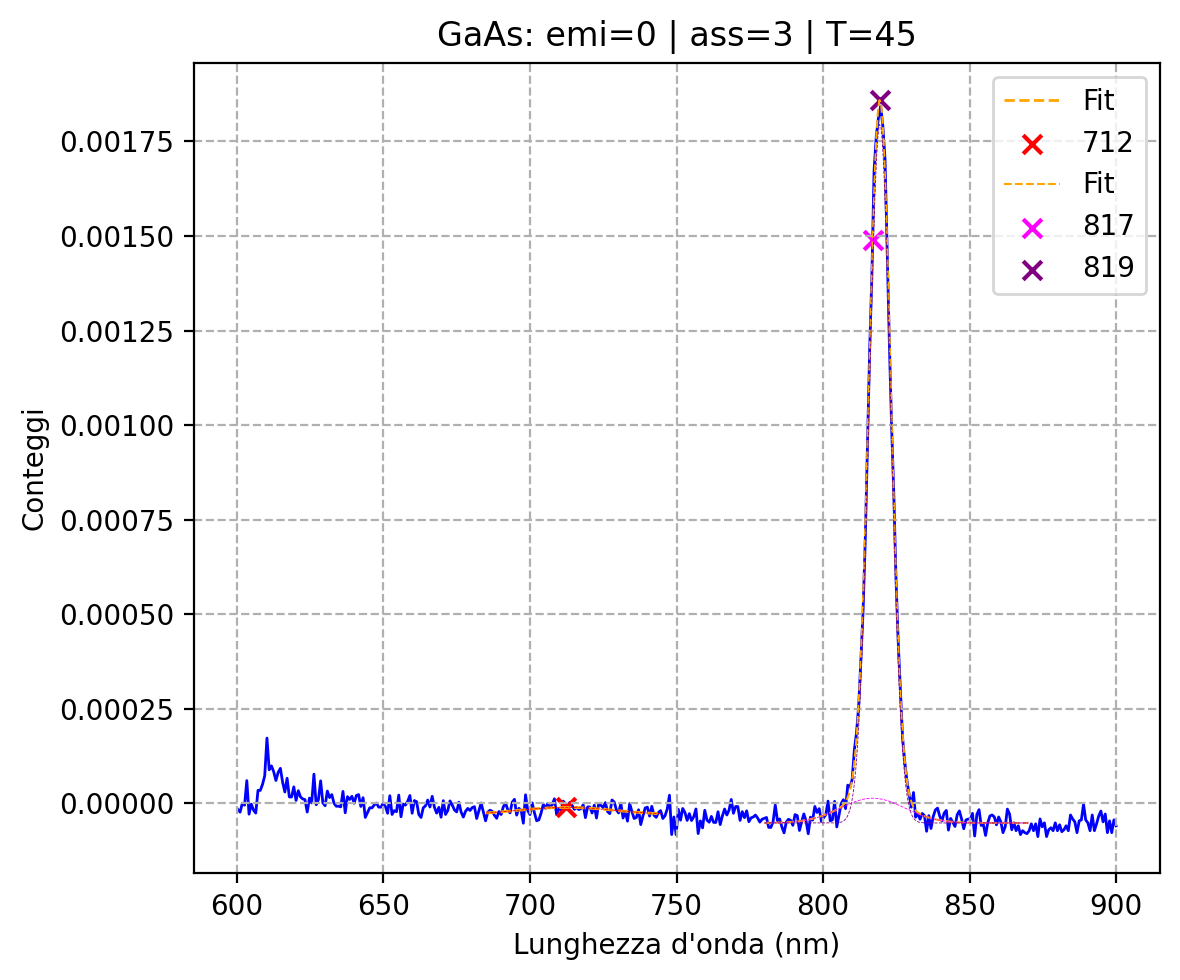

• Gaussiana  1 [red]
 - A = 0.0013184929036139897
 - mu = 704.2872906225754 | 1.7604345343994448 eV
 - sigma = 199.99999998696117 | 0.499919438480421 eV
 - chi2rid = 0.3986981157741122
• Gaussiana  2 [magenta]
 - A = 0.0011144543479720674
 - mu = 820.9234244067486 | 1.517180449453398 eV
 - sigma = 3.685616313935195 | 0.012059531429755055 eV
• Gaussiana  3 [purple]
 - A = 0.00021219007811344764
 - mu = 817.2077810502286 | 1.510313424722404 eV
 - sigma = 6.495695962709103 | 0.006780700406173557 eV
 - chi2rid = 0.05218519359650964


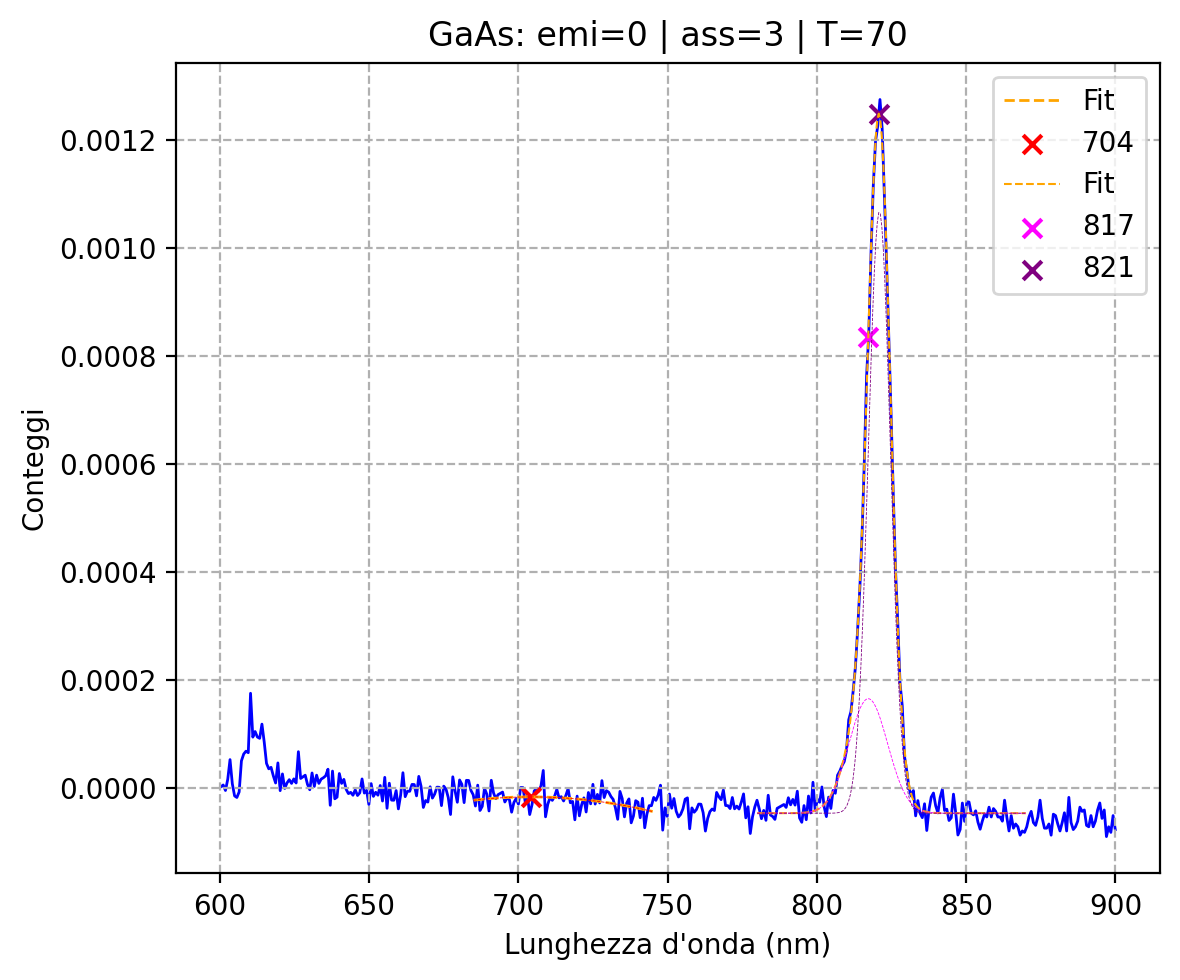

• Gaussiana  1 [magenta]
 - A = 0.00010130267995981751
 - mu = 817.5039380418779 | 1.5166308207888861 eV
 - sigma = 6.98812675344338 | 0.012964351510327142 eV
• Gaussiana  2 [purple]
 - A = 0.000366484661859822
 - mu = 824.4243460193502 | 1.5038998721193748 eV
 - sigma = 3.6936920448671535 | 0.006737965734206595 eV
 - chi2rid = 0.04711933986691258


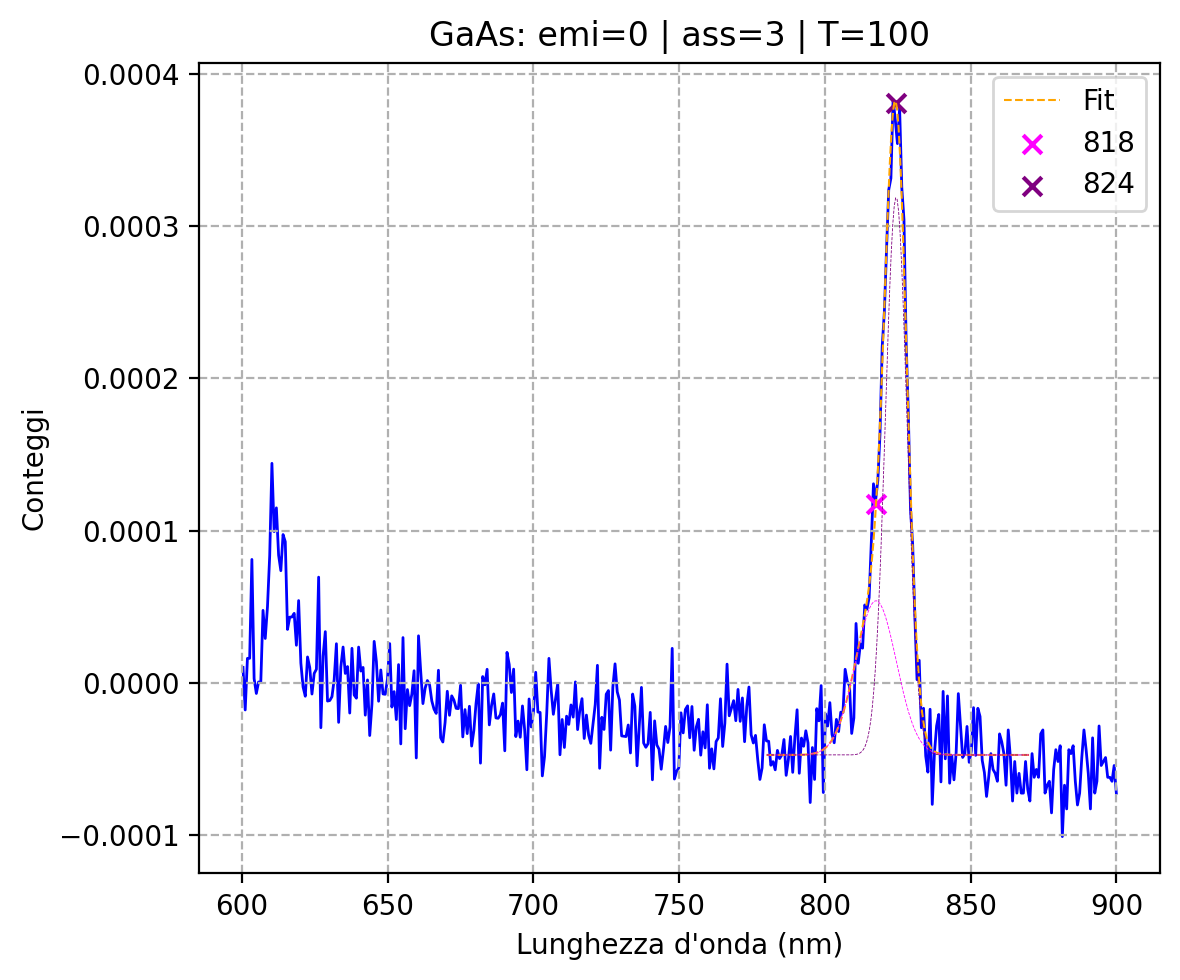

• Gaussiana  1 [magenta]
 - A = 2.1544553192153932e-05
 - mu = 818.0158347667393 | 1.5156817458235987 eV
 - sigma = 2.2075865422404486 | 0.0040903836847532545 eV
• Gaussiana  2 [purple]
 - A = 6.284947247414404e-05
 - mu = 830.8543301843496 | 1.4922611864771798 eV
 - sigma = 4.738396978937121 | 0.00851042793051304 eV
 - chi2rid = 0.10776673384340983


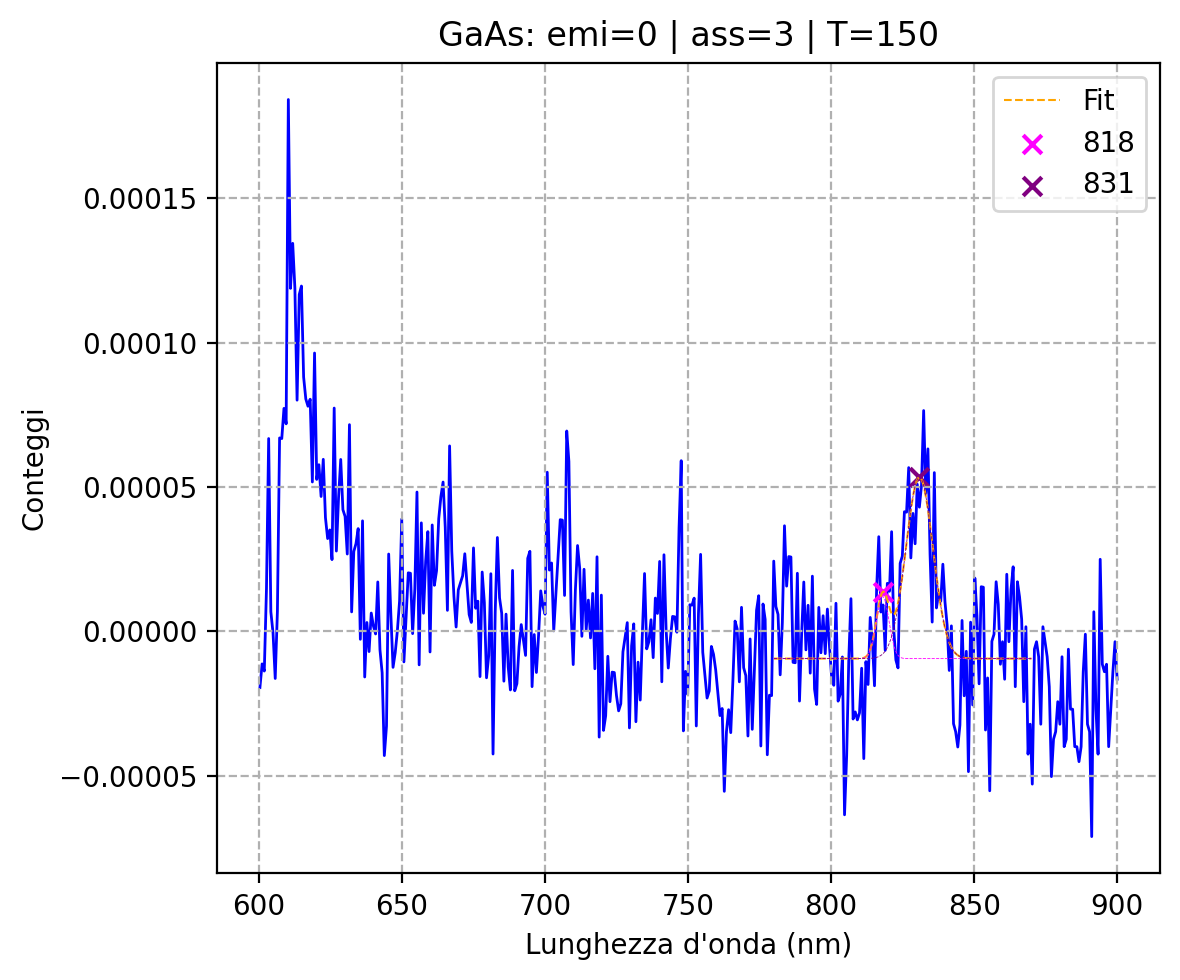

• Gaussiana  1 [red]
 - A = 0.053879161875911095
 - mu = 711.6471639620992 | 1.7422280750023924 eV
 - sigma = 6.476988304978885 | 0.015856721473560674 eV
 - chi2rid = 2.2350452334472544
• Gaussiana  2 [magenta]
 - A = 0.167856724661529
 - mu = 817.5499665452473 | 1.5175580906198356 eV
 - sigma = 4.364695046508795 | 0.01596684288676449 eV
• Gaussiana  3 [purple]
 - A = 0.09065923838166728
 - mu = 817.0044205979565 | 1.5165454336569657 eV
 - sigma = 8.596034182883567 | 0.00809645723558567 eV
 - chi2rid = 10.675010818371854


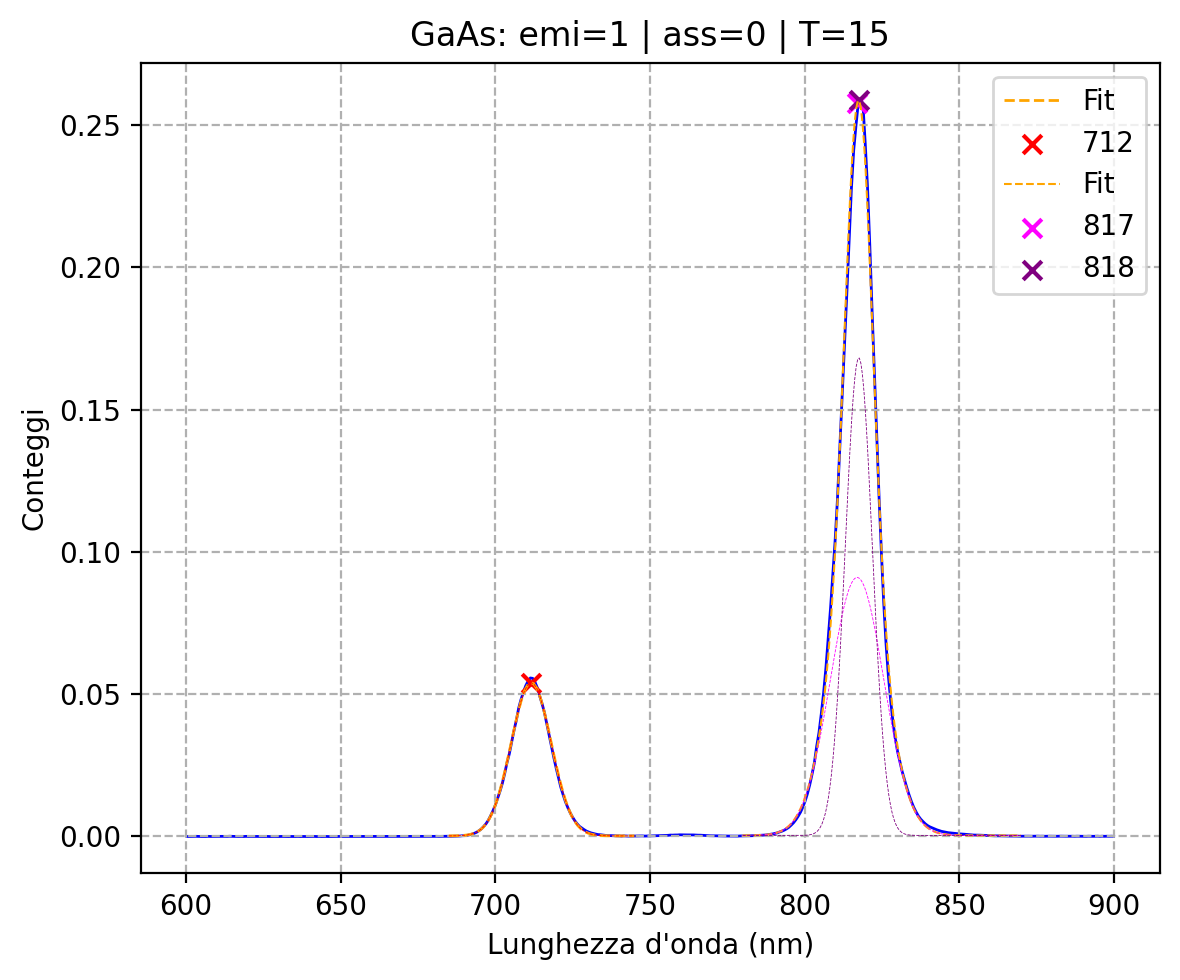

• Gaussiana  1 [red]
 - A = 0.029764890420375122
 - mu = 711.6575246557634 | 1.7422027107074147 eV
 - sigma = 6.867696619167357 | 0.016812749464030583 eV
 - chi2rid = 1.3161170108874303
• Gaussiana  2 [magenta]
 - A = 0.15059081747890715
 - mu = 817.7940329663443 | 1.5184920834337752 eV
 - sigma = 4.44452392837199 | 0.015627250896552678 eV
• Gaussiana  3 [purple]
 - A = 0.0822508655245746
 - mu = 816.5018982166281 | 1.5160928284758286 eV
 - sigma = 8.402862392334127 | 0.008239618512930997 eV
 - chi2rid = 13.304021813416162


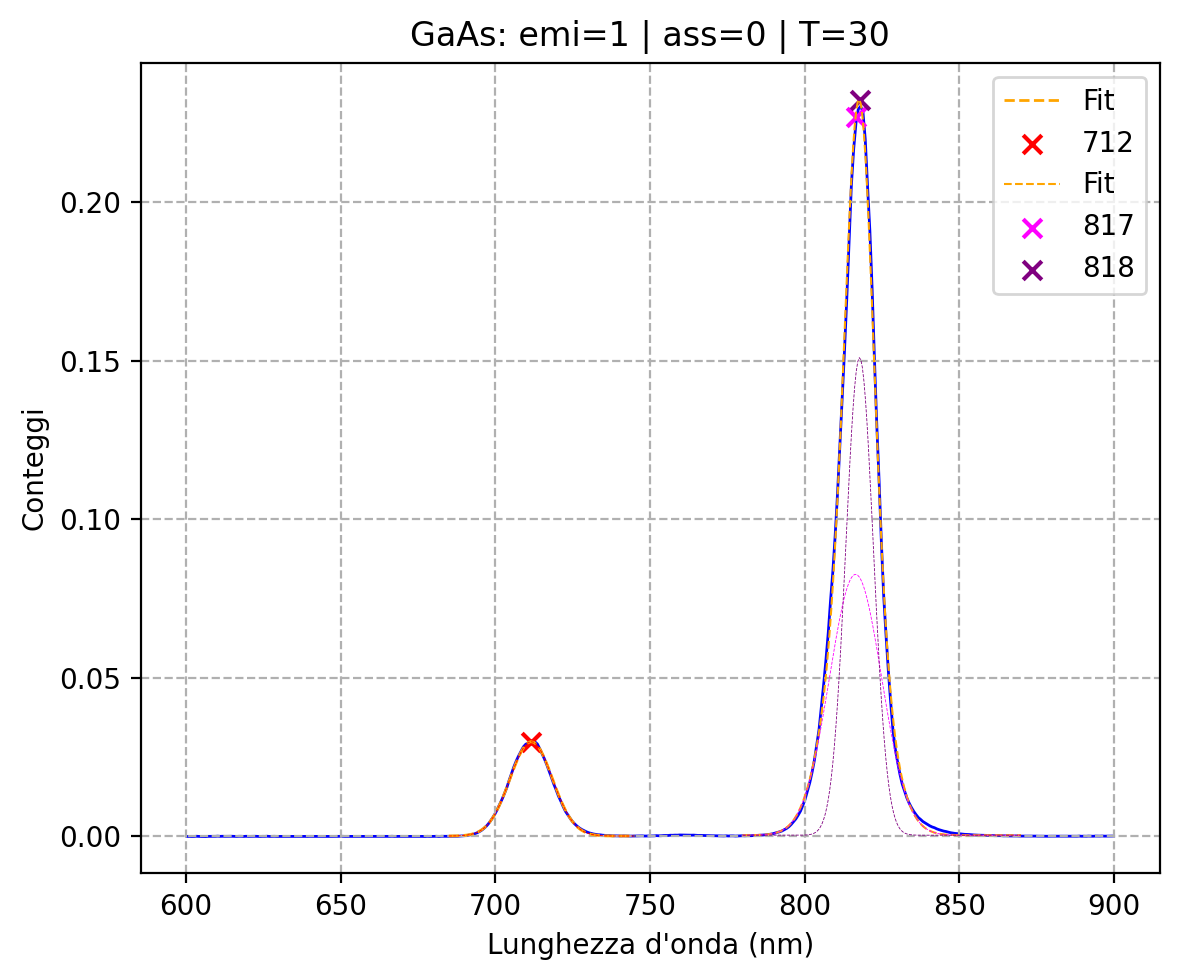

• Gaussiana  1 [red]
 - A = 0.013856135093993843
 - mu = 711.8897547232662 | 1.7416343757223605 eV
 - sigma = 7.367693274267318 | 0.018025021137199157 eV
 - chi2rid = 0.6135361681325799
• Gaussiana  2 [magenta]
 - A = 0.1577813673607589
 - mu = 818.3255869823014 | 1.5176714655535335 eV
 - sigma = 4.765490863261235 | 0.015835820156270712 eV
• Gaussiana  3 [purple]
 - A = 0.08161018045462712
 - mu = 816.9433877432718 | 1.5151080306834095 eV
 - sigma = 8.524222046593293 | 0.008823179418965998 eV
 - chi2rid = 15.780975903065288


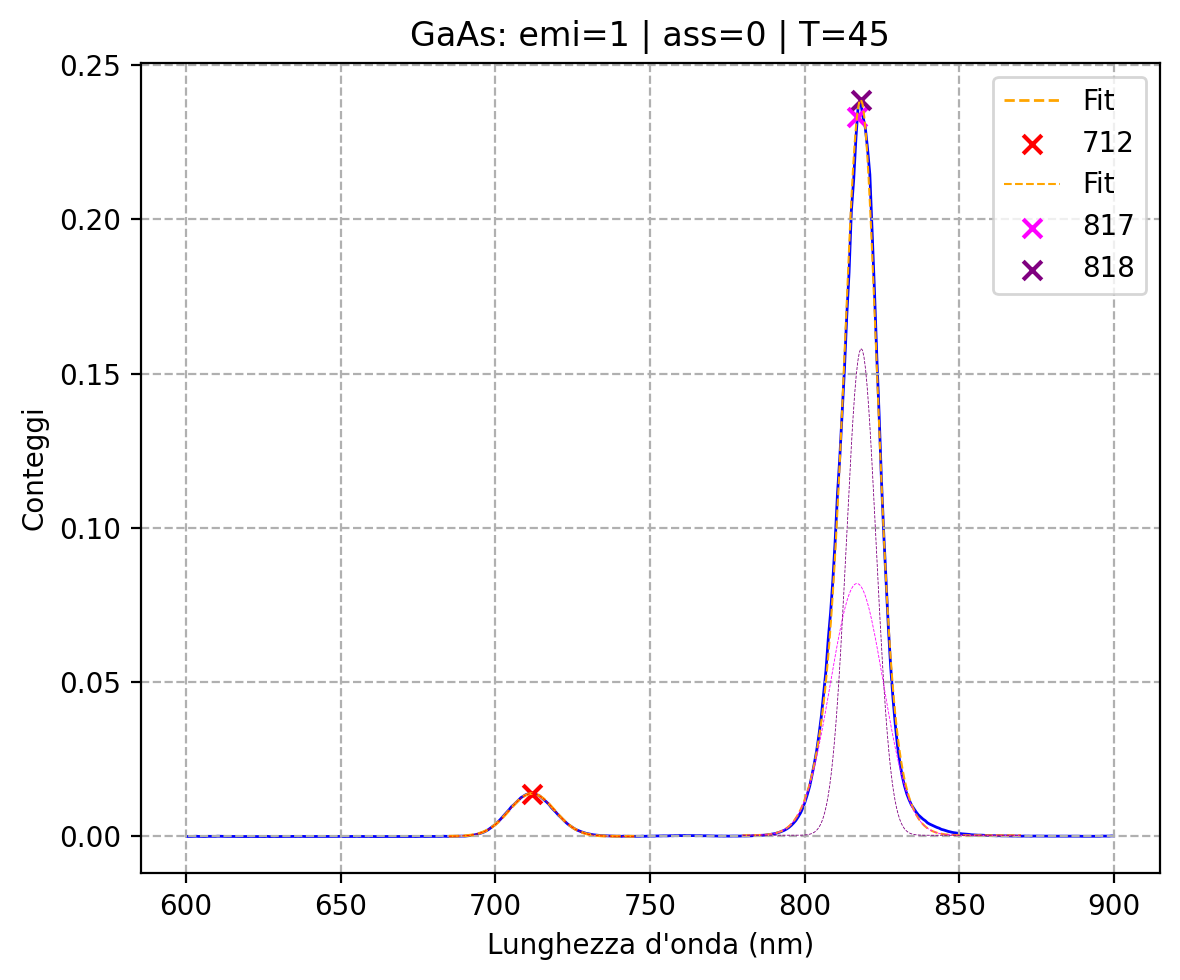

• Gaussiana  1 [red]
 - A = 0.002022238728678651
 - mu = 711.1934162832322 | 1.743339631896747 eV
 - sigma = 8.309558312015989 | 0.020369117594763165 eV
 - chi2rid = 0.3885555906695184
• Gaussiana  2 [magenta]
 - A = 0.13252585464779917
 - mu = 820.1349886272428 | 1.5162051229542028 eV
 - sigma = 5.051636466938088 | 0.01664580133265298 eV
• Gaussiana  3 [purple]
 - A = 0.10271999414318378
 - mu = 817.7334648064302 | 1.5117653627067986 eV
 - sigma = 8.977564177931459 | 0.009311746409559136 eV
 - chi2rid = 12.389837593943378


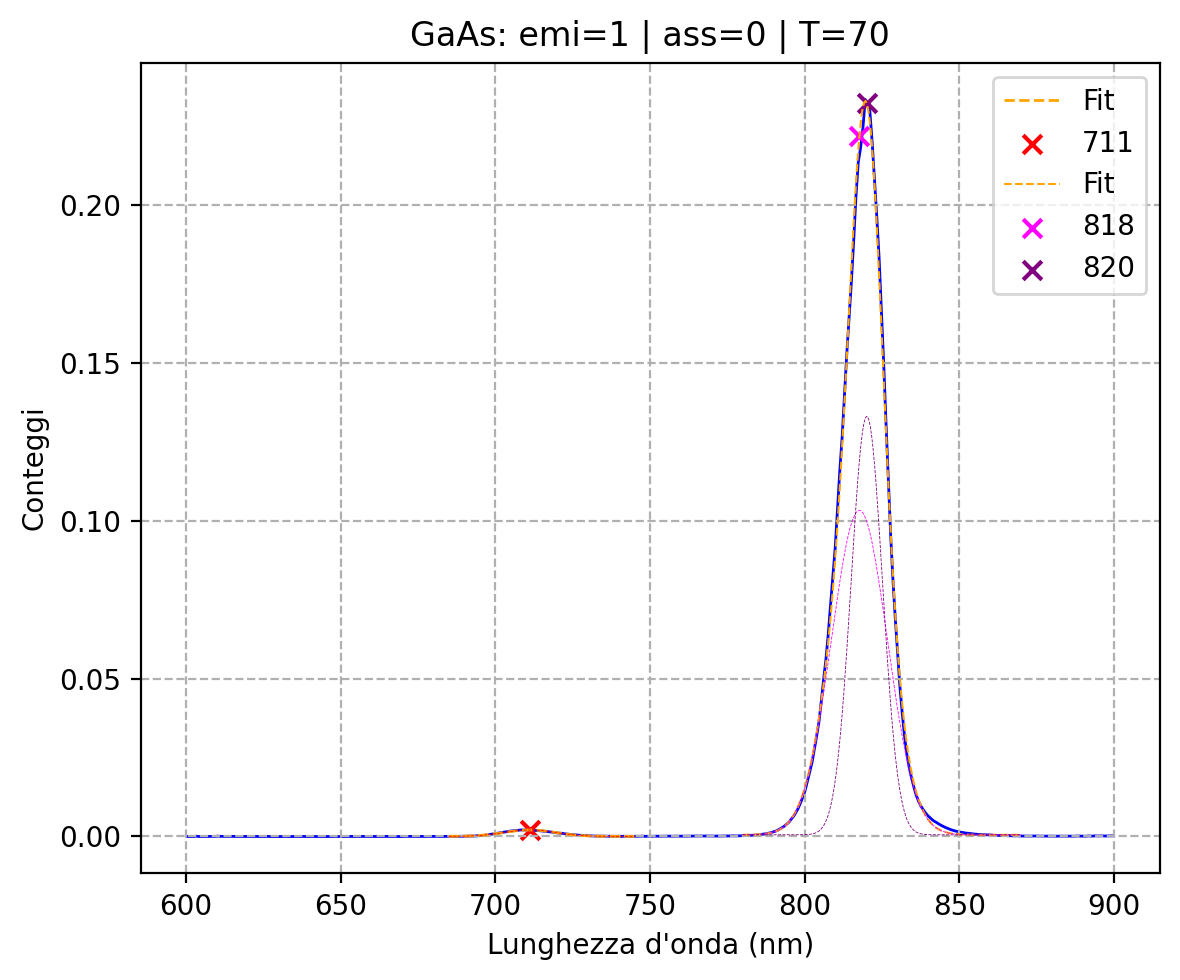

• Gaussiana  1 [magenta]
 - A = 0.08653076513286032
 - mu = 819.6270265490864 | 1.5127022760227964 eV
 - sigma = 10.736112223511762 | 0.019814550850672543 eV
• Gaussiana  2 [purple]
 - A = 0.09109871123031213
 - mu = 823.8751271588942 | 1.5049024150373211 eV
 - sigma = 5.8896088998798835 | 0.01075804617092797 eV
 - chi2rid = 5.050262472663227


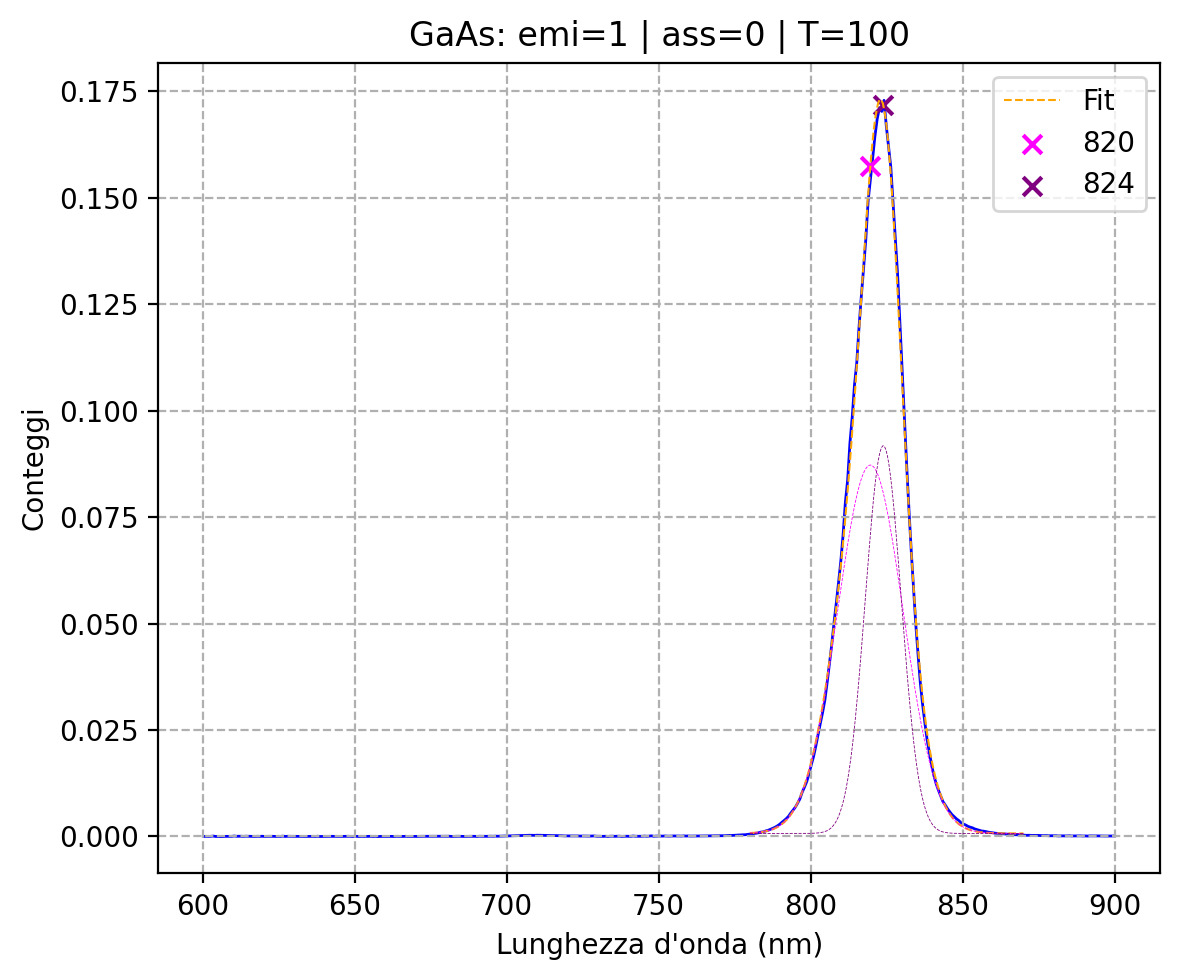

• Gaussiana  1 [magenta]
 - A = 0.051468203406962044
 - mu = 833.0699574930748 | 1.505448481371702 eV
 - sigma = 8.229612930176675 | 0.025381269454806236 eV
• Gaussiana  2 [purple]
 - A = 0.041731796550823916
 - mu = 823.5762856666464 | 1.4882923785676268 eV
 - sigma = 13.885172346812764 | 0.01470233092956705 eV
 - chi2rid = 1.8063058350126888


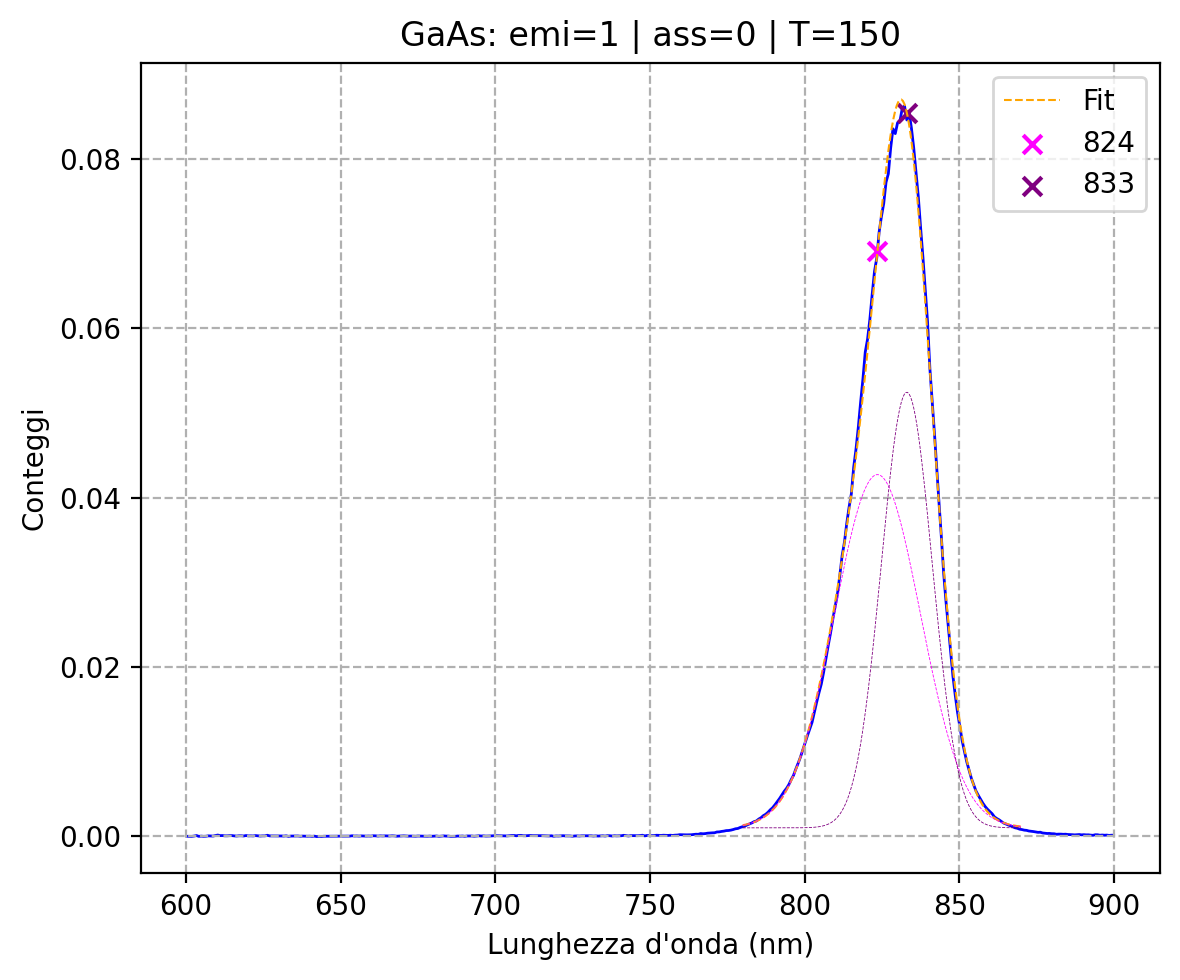

In [16]:
# Per ciascuno dei due valori di ass

raccoglitore_1 = {
    'ass=0': {
        'emi=0o5':  [],
        'emi=1':    [],
        'emi=1o5':  [],
        'emi=2':    [],
        'emi=2o5':  [],
        'emi=3':    []
    },
    'ass=1': []
}

picchi_in_eV = {}

for ass in d_o_ass:
    emi_list = d_o_emi[1:] if ass == '0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        arr_energia = []

        picchi_in_eV[(ass,emi)] = {}
        
        # Ciclo sulla temperatura
        for temp in arr_temperatura:
            try:
                nome_file = build_name(campione_2, emi, ass, temp, cartella='data/rampa_T/')
                waveln, counts = leggi_file(nome_file)
                
            except FileNotFoundError:
                print(f"File non trovato: {nome_file}")
                continue
            
            picchi_in_eV[(ass,emi)][temp] = []
            
            # converto
            waveln = np.array(waveln)
            counts = np.array(counts)
            
            ## normalizzo i counts ##
            # creo vettore degli errori sui counts normalizzati (propagando errore)
            counts_sicuro = np.where(counts == 0, 1, counts)  
            err_counts = (np.sqrt(counts_sicuro)/conteggio_massimo_assoluto) / (np.sqrt(40*n_acq)) 
            # sul massimo count del plot attualmente considerato
            '''maximum = np.max(counts)
            counts = counts / maximum'''
            # sul massimo count di tutti i plot
            counts = counts_sicuro / conteggio_massimo_assoluto 
            
            ## prendo il massimo dei counts normalizzati per impostare i bounds di A ##
            massimo_locale = np.max(counts)
            low_A = massimo_locale/500
            upp_A = 2*massimo_locale
            init_A = massimo_locale/20
            
            # traslo per correggere lo spostamento dovuto al rumore
            counts = trasla_counts(waveln, counts)
                    
            # Plot
            plt.figure(figsize=(6,5), dpi=200)
            plt.plot(waveln, counts, linestyle='-', color='b', linewidth=1., zorder=1)
            
            ## ## ## ## # FIT # ## ## ## ##
            result = {}
            
            result['Regione 1'] = []

            # TODO: PASSARE I POPT DELLA REGIONE 1 AL FIT DELLE REGIONI INSIEME
            ## REGIONE 1 ##
            
            # isolo regione 700 < x < 800 [REGIONE 1]
            mask1 = (waveln > 685) & (waveln < 745)
            x_fit1 = waveln[mask1]
            y_fit1 = counts[mask1]
            err_counts1 = err_counts[mask1]
            
            # impostazione parametri: ogni entrata è una tripla (a, mu, sigma) [REGIONE 1]
            params1 = [
                (init_A, 710, 50) # il picco del bulk sempre presente
            ]
            
            # Set dei bounds [REGIONE 1]
            low1 = [low_A, 690, 0] * len(params1)  # Es: A >= 0, mu >= 1500, sigma >= 10 [0.007, inf, 4]
            upp1 = [upp_A, 740, 200] * len(params1)  # Limiti superiori
            
            # alziamo un po' la tolleranza che vedo dei chi quadri minuscoli con 2 gaussiane
            tolleranza1 = 1.2
            
            # HACK: a 150 nella regione 1 non si vede niente: elimino i parametri (aiuta per dopo)
            if temp == 150 or temp == 100:
                params1 = []
                result['Regione 1'].append((np.nan, 0, np.nan, np.nan))
            else: # nella regione 1 a 150K non si vede nulla!
                popt1, pcov1, chi2_reduced1 = fit_N_gaussiane(x_fit1, y_fit1, params1, 
                                                          bounds=(low1,upp1), 
                                                          N_MAX_GAUSS=1,
                                                          n_acq=n_acq,
                                                          PREVENT_OVERFIT=False,
                                                          err_counts=err_counts1,
                                                          tolleranza=tolleranza1,
                                                          DELTA_Y=DELTA_Y)
                
                # HACK: SE USI IL FIT DELLE REGIONI INSIEME QUESTO PLOT È RIDONDANTE
                ## PLOT CURVA FIT [REGIONE 1] ##
                x_plot1 = np.linspace(685, 745, 60)
                if DELTA_Y:
                    y_plot1 = N_gaussiane_traslate(x_plot1, *popt1)
                else:
                    y_plot1 = N_gaussiane(x_plot1, *popt1)
                plt.plot(x_plot1, y_plot1, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
                    
                # estraggo da popt i parametri ottimizzati [REGIONE 1]
                valori1 = [] # inizializzo
                for i in range(0, round(len(popt1)/3)):
                    valori1.append((popt1[3*i], popt1[3*i+1], popt1[3*i+2]))
                    
                # li imposto per la prossima gaussiana
                params1 = valori1
                
                # organizzo i picchi in ordine crescente [REGIONE 1]
                valori1 = sorted(valori1, key=lambda p: float(p[1]))
                n_picchi1 = len(valori1)
                
                # raccolta ordinata
                for i in range (n_picchi1):
                    result['Regione 1'].append((valori1[i][1], 0, valori1[i][2], valori1[i][0]))
                
                # plotto i picchi individuati dal fit [REGIONE 1]
                for i in range(n_picchi1): 
                    x_picco1 = valori1[i][1]
                    if DELTA_Y:
                        y_picco1 = N_gaussiane_traslate(x_picco1, *popt1)
                    else:
                        y_picco2 = N_gaussiane(x_picco2, *popt2)
                    plt.scatter(x_picco1, y_picco1, 
                                color=col[i], marker='x',
                                label=str(round(x_picco1)), # stampa nel plot le lambda dei picchi
                                s=45, #alpha=0-1 per opacità
                                #zorder=3
                                )
                
                # plotto singolarmente le gaussiane [REGIONE 1]
                for i in range(n_picchi1):
                    y_gauss1 = gaussiana(x_plot1, *valori1[i])
                    if DELTA_Y:
                        y_gauss1 += popt1[-1] # traslo anche le singole gaussiane per plottare bene
                    plt.plot(x_plot1, y_gauss1, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
                    
                ## PRINT RISULTATI FIT [REGIONE 1] ##
                for i in range(0, round(len(popt1)/3)):
                    print('• Gaussiana ', i+1, '[' + col[i] + ']')
                    print(' - A =', popt1[3*i])
                    
                    # produco i risultati anche in eV
                    mu_in_eV1 = lambda_to_E(valori1[i][1])
                    sigma_in_eV1 = err_lambda_to_E(valori1[i][1],valori1[i][2])
                
                    print(' - mu =', popt1[3*i+1], '|', mu_in_eV1, 'eV')
                    print(' - sigma =', popt1[3*i+2], '|', sigma_in_eV1, 'eV')
                    
                    picchi_in_eV[(ass,emi)][temp].append([valori1[i][0],mu_in_eV1, sigma_in_eV1])
                    
                print(' - chi2rid =', chi2_reduced1)
                
            #------------#------------#------------#------------#------------#------------#------------
            ## REGIONE 2 ## #------------#------------#------------#------------#------------
            
            result['Regione 2'] = []
            
            inf2 = 780
            sup2 = 870
            
            # isolo regione 800 < x < 860 [REGIONE 2]
            mask2 = (waveln > inf2) & (waveln < sup2)
            x_fit2 = waveln[mask2]
            y_fit2 = counts[mask2]
            err_counts2 = err_counts[mask2]
            
            # impostazione parametri: ogni entrata è una tripla (a, mu, sigma) [REGIONE 2]
            params2 = [
                (init_A, 819, 3), # ne passo direttamente due che tanto sono sempre 2
                (init_A, 822, 11) #
            ]
            
            # Set dei bounds
            low2 = [low_A, inf2, 1] * len(params2)  
            upp2 = [upp_A, sup2, 200] * len(params2)
            
            if temp == 15:
                n_max_gauss_2 = 2
            else:
                n_max_gauss_2 = 2
            
            popt2, pcov2, chi2_reduced2 = fit_N_gaussiane(x_fit2, y_fit2, params2, 
                                                          bounds=(low2,upp2),
                                                          N_MAX_GAUSS=n_max_gauss_2,
                                                          n_acq=n_acq,
                                                          PREVENT_OVERFIT=False,
                                                          err_counts=err_counts2,
                                                          DELTA_Y=DELTA_Y)
            
        
            ## PLOT CURVA FIT [REGIONE 2] ##
            x_plot2 = np.linspace(inf2, sup2, round(2*(sup2-inf2)))
            if DELTA_Y:
                y_plot2 = N_gaussiane_traslate(x_plot2, *popt2)
            else:
                y_plot2 = N_gaussiane(x_plot2, *popt2)
            plt.plot(x_plot2, y_plot2, linestyle='--', color='orange', label=f"Fit", linewidth=0.75, zorder=2)
            
            # estraggo da popt i parametri ottimizzati [REGIONE 2]
            valori2 = [] # inizializzo
            for i in range(0, round(len(popt2)/3)):
                valori2.append((popt2[3*i], popt2[3*i+1], popt2[3*i+2]))
                
            # li imposto per la prossima gaussiana [REGIONE 2]
            params2 = valori2
            
            # organizzo i picchi in ordine crescente [REGIONE 2]
            valori2 = sorted(valori2, key=lambda p: float(p[1]))
            n_picchi2 = len(valori2)
            
            # raccolta ordinata
            for i in range (n_picchi2):
                result['Regione 2'].append((valori2[i][1], 0, valori2[i][2], valori2[i][0]))
            
            
            # plotto i picchi individuati dal fit [REGIONE 2]
            for i in range(n_picchi2): 
                x_picco2 = valori2[i][1]
                if DELTA_Y:
                    y_picco2 = N_gaussiane_traslate(x_picco2, *popt2)
                else:
                    y_picco2 = N_gaussiane(x_picco2, *popt2)
                plt.scatter(x_picco2, y_picco2, 
                            color=col[i+2], marker='x',
                            label=str(round(x_picco2)), # stampa nel plot le lambda dei picchi
                            s=45, #alpha=0-1 per opacità
                            #zorder=3
                            )
            
            # plotto singolarmente le gaussiane [REGIONE 2]
            for i in range(n_picchi2):
                y_gauss2 = gaussiana(x_plot2, *valori2[i])
                if DELTA_Y:
                    y_gauss2 += popt2[-1] # traslo anche le singole gaussiane per plottare bene
                plt.plot(x_plot2, y_gauss2, linestyle='--', color=col[i+2], linewidth=0.3, zorder=2)
            
            ## PRINT RISULTATI FIT [REGIONE 2] ##
            for i in range(0, round(len(popt2)/3)):
                print('• Gaussiana ', i+1 +len(params1), '[' + col[i+2] + ']')
                print(' - A =', popt2[3*i])
                
                # produco i risultati anche in eV
                mu_in_eV2 = lambda_to_E(valori2[i][1])
                sigma_in_eV2 = err_lambda_to_E(valori2[i][1],valori2[i][2])
            
                print(' - mu =', popt2[3*i+1], '|', mu_in_eV2, 'eV')
                print(' - sigma =', popt2[3*i+2], '|', sigma_in_eV2, 'eV')
                
                picchi_in_eV[(ass,emi)][temp].append([valori2[i][0],mu_in_eV2, sigma_in_eV2])
                
            print(' - chi2rid =', chi2_reduced2)
            
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________
            
            # HACK: qui non è necessario unire le due regioni
            
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________            
            
            ## RACCOLTA DEI PICCHI ##
            if ass == '1':
                raccoglitore_1['ass=1'].append(result)
            else:
                raccoglitore_1['ass=0']['emi='+emi].append(result)
            
        
            
            
            ## OPZIONI GRAFICHE ##
            # HACK: ho invertito emi e ass, vedo di sistemarla così: li inverto poi li ri-inverto
            help = emi
            emi = ass
            ass = help
        
            # Titolo e legenda
            plt.title(f"GaAs: emi={emi} | ass={ass} | T={temp}")
            plt.xlabel("Lunghezza d'onda (nm)")
            plt.ylabel("Conteggi")
            plt.legend()
            plt.grid(linestyle='--')
            plt.tight_layout()
            plt.show()
            
            # ri-inverto
            ass = emi
            emi = help
            
            
            # per plottare curve tutte sovrapposte a ass=0, emi=1
            if ass=='1' and emi=='0':
                # converto in eV
                ene = lambda_to_E(waveln)
                # seleziono regione 
                mask_sovra = (ene > 1.45) & (ene < 1.85)
                x_sovra.append(ene[mask_sovra])
                y_sovra.append(counts[mask_sovra])

---

---

In [17]:
raccoglitore_1

{'ass=0': {'emi=0o5': [{'Regione 1': [(712.2170490682385,
      0,
      6.010777247385171,
      0.2773637399342149)],
    'Regione 2': [(817.8885480315661,
      0,
      4.040345044162972,
      0.7659062568013875),
     (819.6014383858871, 0, 8.465126947355232, 0.1824239439391691)]},
   {'Regione 1': [(712.8024794142275,
      0,
      6.465049468915611,
      0.17173972646015181)],
    'Regione 2': [(818.0817029423771,
      0,
      4.268868117382121,
      0.8682369610141963),
     (818.5074676724711, 0, 8.760322414196889, 0.12305351641859133)]},
   {'Regione 1': [(713.3616740661226,
      0,
      7.199856000650226,
      0.05465052991176219)],
    'Regione 2': [(818.004770891568,
      0,
      8.407091505744408,
      0.14433976756574632),
     (818.6324682221388, 0, 4.429218466055875, 0.7620678159030413)]},
   {'Regione 1': [(712.6766219606212,
      0,
      8.594514353008709,
      0.004329916859968851)],
    'Regione 2': [(818.289813193409,
      0,
      8.32033487934300

---

---

## Plotto le regioni QD in eV per emi=1 ass=0

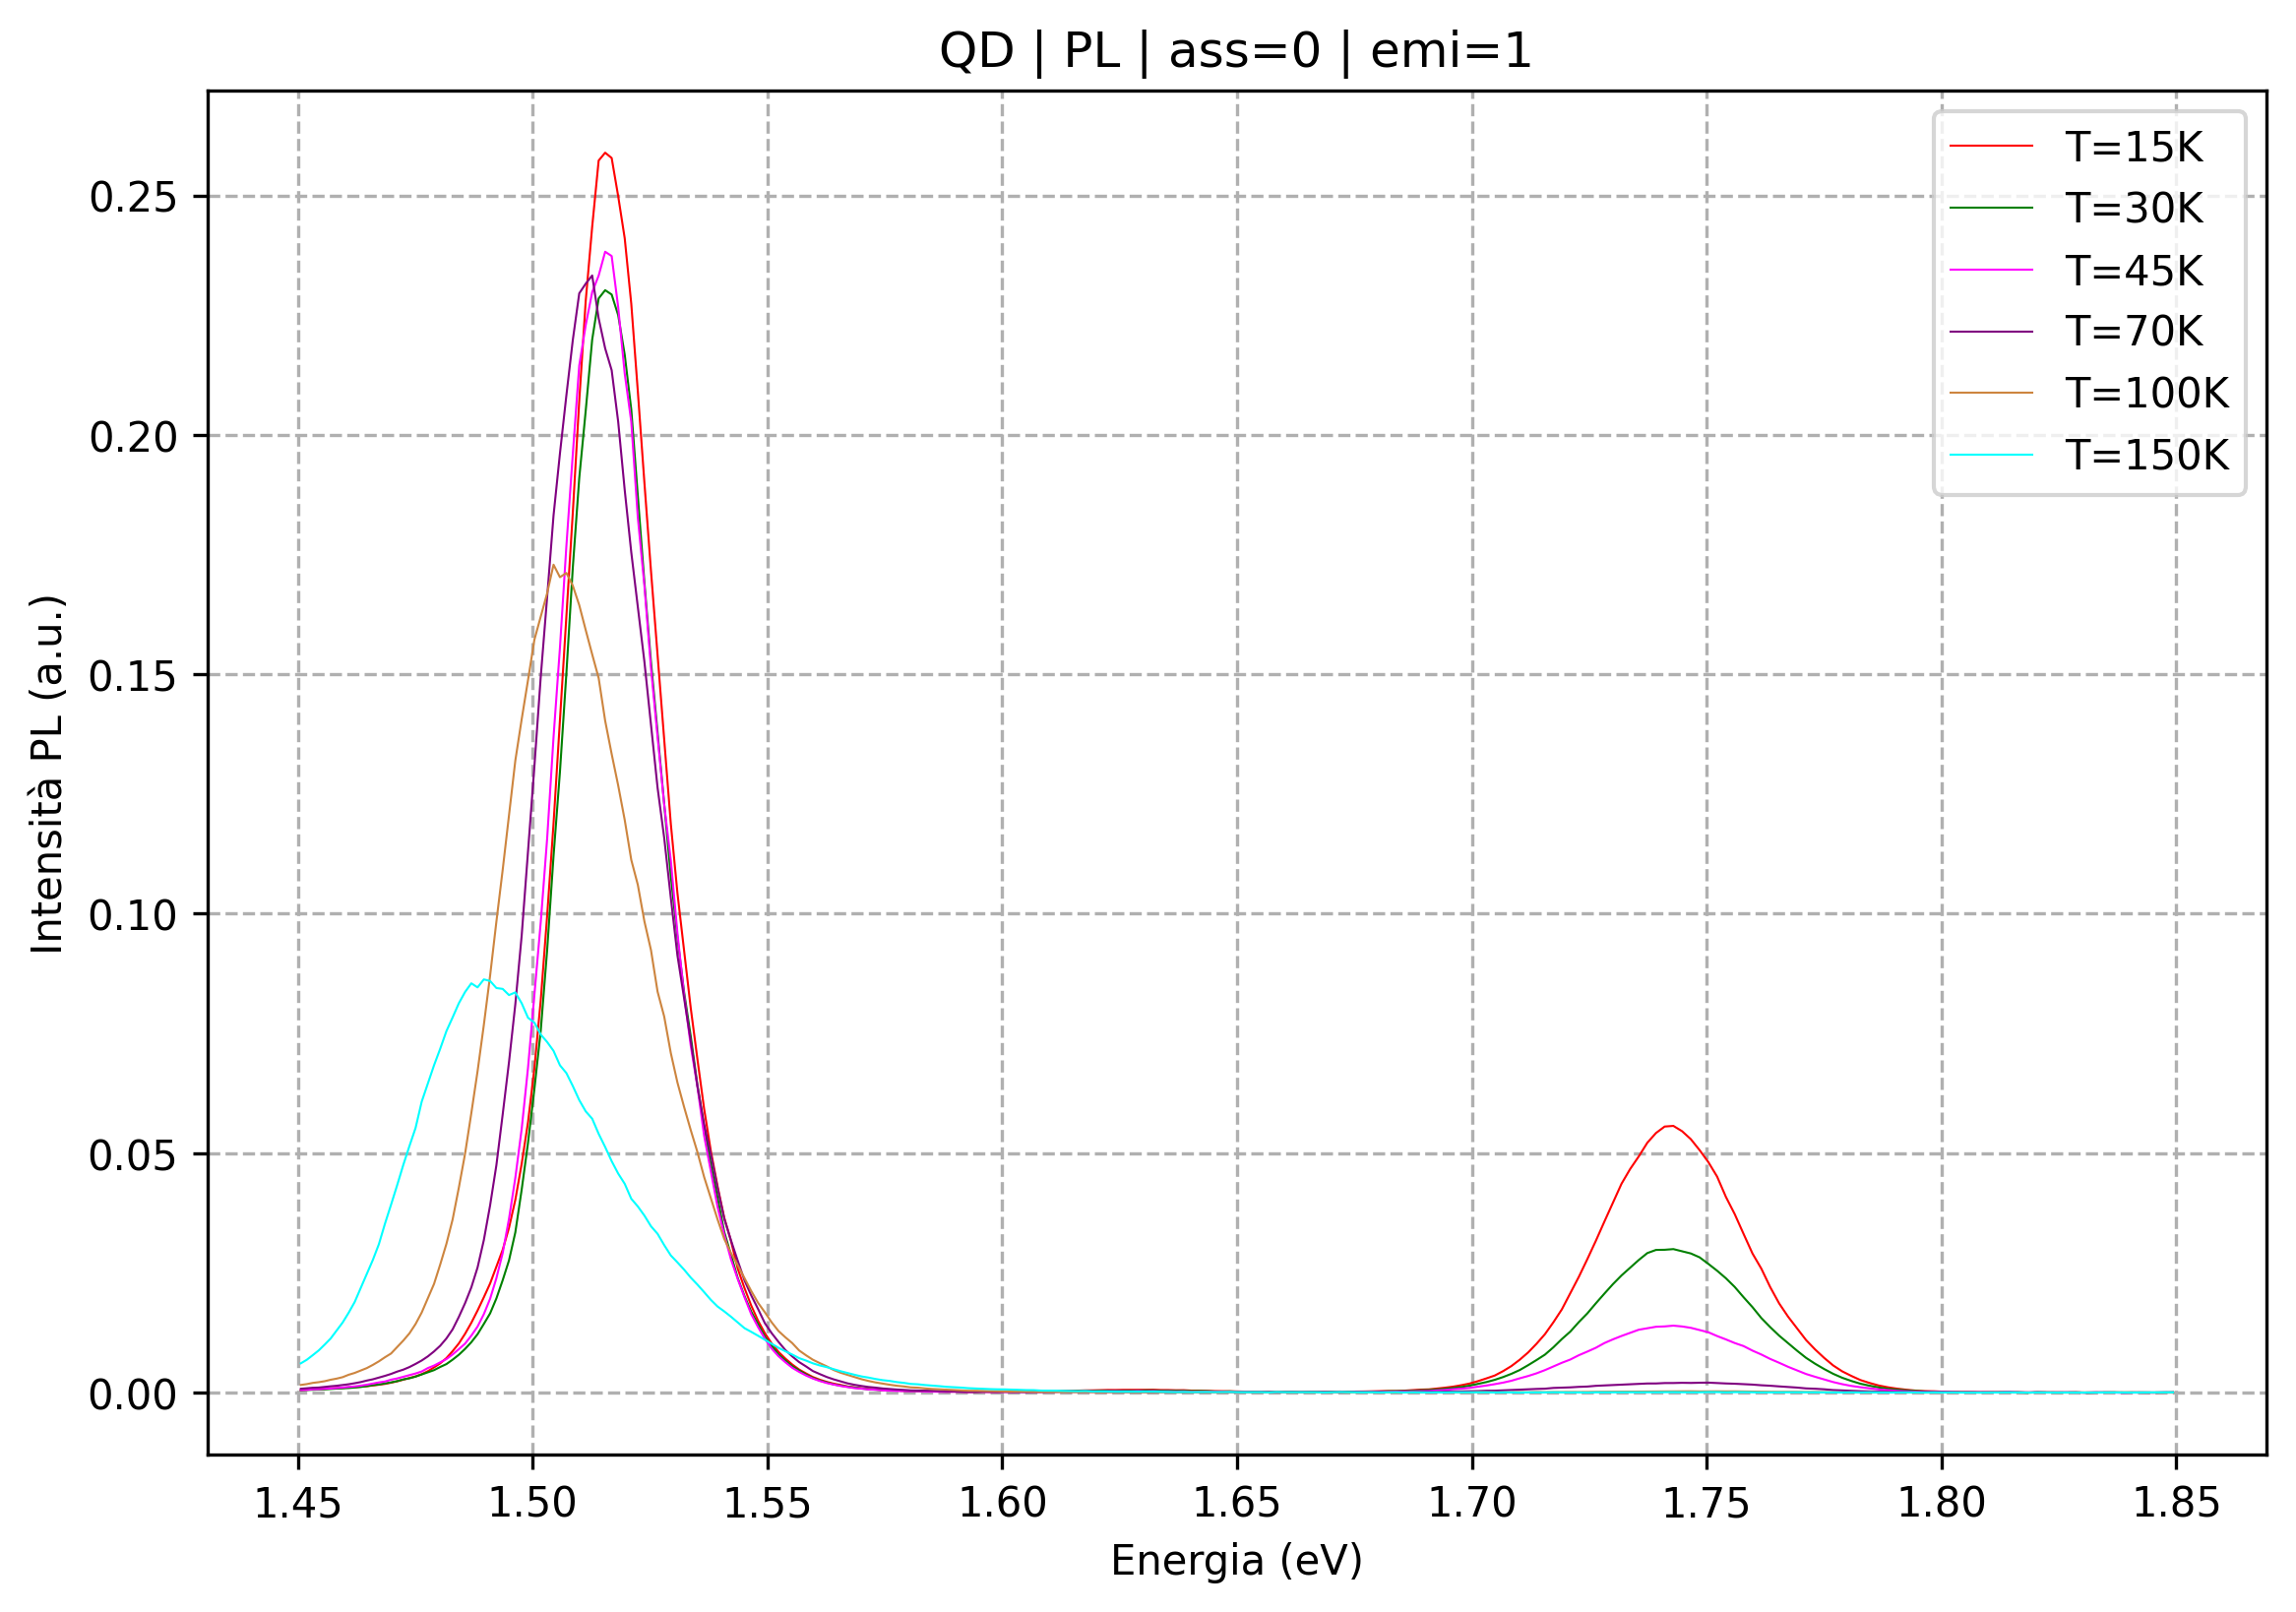

In [18]:
### Plot gaussiane al variare di T per ass=0 emi=1
plt.figure(figsize=(9, 6), dpi=300)

i=0

# per ogni temperatura, estraggo sigma e a corrispondenti a ass=0 emi=1 e plotto la gaussiana 
for x, y in zip(x_sovra,y_sovra):
    if len(y) > 0:
        plt.plot(x, y, linestyle='-', color=col[i], linewidth=0.5, label='T='+str(arr_temperatura[i])+'K')
    i+=1
# Aggiungere etichette e legenda
plt.title('QD | PL | ass=0 | emi=1')
plt.xlabel('Energia (eV)')
plt.ylabel('Intensità PL (a.u.)')
plt.grid(linestyle='--')
plt.legend()

# Mostrare il grafico
plt.show()